<a id="1"></a>
<span style="display: block; text-align: center; background-color: #40E0D0; font-family: Times New Roman; color: white; padding: 14px; line-height: 1; border-radius: 20px; font-size: 2em;">EXPLORATORY DATA ANALYSIS ROADMAP</span>

# Import Library

In [ ]:
# EDA için kütüphaneler
import pandas as pd              # for Pandas
import numpy as np               # for NumpPy
import matplotlib.pyplot as plt  # for Matplotlib
import seaborn as sns            # For Seaborn
import cufflinks as cf


# Plotly Libraris
import plotly
import plotly.express as px
import plotly.graph_objects as go

# Grafikleri göstermek için
%matplotlib inline # kod ile sonucun ayni kod bloku icinde cikmasi icin



import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show") 

# Uyarı mesajlarını göstermemek için uyarı filtresi uygular. 
# Bu, kodu çalıştırdığınızda uyarı mesajlarının görünmesini engeller.


plt.rcParams["figure.figsize"] = (10,6)
# Matplotlib kütüphanesindeki grafik boyutlarını (figür boyutu) ayarlar. 
# Burada (10,6), genişliği 10 ve yüksekliği 6 birim olan bir çerçeve boyutu belirtilir.

sns.set_style("whitegrid")
# Seaborn kütüphanesindeki grid görünümünü beyaz bir arka planla ayarlar.

pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pandas kütüphanesindeki float formatını ayarlar. 
# Burada lambda fonksiyonu kullanılarak, ondalık sayıların görüntülenme formatı ayarlanır.

pd.set_option('display.max_rows', None)
# veri çerçevelerindeki tüm satırların görüntülenmesini istemiyorsanız, display.max_rows seçeneğini None olarak ayarlar.

pd.set_option('display.max_columns', None)
# veri çerçevelerindeki tüm sütunların görüntülenmesini istemiyorsanız, display.max_columns seçeneğini None olarak ayarlar.


### Lokal'de GPU var mı?

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


### Versiyon Kontrol

In [4]:
#!pip install pandas==1.4.3

#!pip install matplotlib==3.5.2

#!pip install seaborn==0.11.2

#!pip install numpy==1.23.1

#!pip install plotly==5.10.0

#!pip install yellowbrick==1.5

#!pip install sklearn==1.1.2
#!pip install --upgrade scikit-learn==1.1.2


ERROR: Could not find a version that satisfies the requirement sklearn==1.1.2 (from versions: 0.0, 0.0.post1, 0.0.post2, 0.0.post4, 0.0.post5, 0.0.post7, 0.0.post9)
ERROR: No matching distribution found for sklearn==1.1.2


In [1]:
import platform  # Bu modülü içe aktararak, üzerinde çalıştığınız platform hakkında detaylı bilgilere erişebilirsiniz. 
import sklearn   
#import yellowbrick.version
#import plotly.version
import tensorflow

print('Python version:', platform.python_version())
print('Seaborn version:', sns.__version__)
print('Matplotlib version:', matplotlib.__version__)
print('Pandas version:', pd.__version__)
print('Numpy version:', np.__version__)
print('Sklearn version:', sklearn.__version__)
#print('Yellowbrick version:', yellowbrick.__version__)
#print('Plotly version:', plotly.__version__)
print('Tensorflow version:', tensorflow.__version__)


ModuleNotFoundError: No module named 'sklearn'

python==3.10.8

seaborn==0.11.2 

matplotlib==3.5.2

pandas==1.4.3 

numpy==1.23.1 

sklearn==1.1.2

yellowbrick==1.5

plotly==5.10.0

tensorflow_gpu-2.10.0

In [2]:
import tensorflow as tf
print(tf.__version__)


2.10.0


## Read Data 

In [ ]:
# From csv and txt;
df = pd.read_csv("co2.csv") # solverleri ekleyelim

# From embedded libraries; 


# From Excel;

df.to_excel('son.xlsx', index=False) # excel olarak kaydetmek sonra excel olarak okutma
df = pd.read_excel('son.xlsx')

### Manuel Data Frame Olusturma

In [ ]:
# Define a Pandas Dataframe with all crypto allocation in a given portfolio
# Note that total sum = 100% 
crypto_df = pd.DataFrame(data = {'allocation %':[20, 55, 5, 17, 3]}, index = ['BTC', 'ETH', 'LTC', 'XRP', 'ADA'])
crypto_df

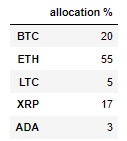

### "object" türündeki sütunları 

In [ ]:
#Bu kod, bir Pandas DataFrame üzerinde işlem yapar ve veri çerçevesindeki sütunları seçer, ancak yalnızca "object" türündeki sütunları (dizeleri) getirir. Bu, genellikle kategorik veri veya metin içeren sütunları seçmek için kullanılır.
df.select_dtypes(include ="object").head()  


#Bu kod, bir Pandas DataFrame üzerinde işlem yapar ve veri çerçevesindeki sayısal (numeric) türdeki sütunları seçer. Bu tür bir seçim, genellikle sayısal veriler üzerinde analiz yapmak veya makine öğrenimi modelleri eğitmek gibi durumlar için kullanılır.
df_numeric = df.select_dtypes(include ="number")
df_numeric 

# EDA

## Look at the Data

In [ ]:
# Bastan ilk 5 satiri gormek icin;
df.head(5)

In [ ]:
# Sondan 5 satiri gormek icin;
df.tail(5)

In [ ]:
# Rasgele 10 satiri gormek icin;
df.sample(10)

In [ ]:
# Dataya genel olarak bakmak icin;
df.info()

## Summary

In [ ]:
from summarytools import dfSummary

dfSummary(df)

In [ ]:
def SuperInfo(df, dropna=False):
    """
    Returns a dataframe consisting of datatypes, nuniques, #s of nulls head(1), most frequent item and its frequncy,
    where the column names are indices.
    """
    dt=pd.DataFrame(df.dtypes, columns=["Type"])
    dn=pd.DataFrame(df.nunique(), columns=["Nunique"])
    nonnull=pd.DataFrame(df.isnull().sum(), columns=["#of Missing"])
    firstT=df.head(1).T.rename(columns={0:"First"})
    MostFreqI=pd.DataFrame([df[x].value_counts().head(1).index[0] for x in df.columns], columns=["MostFreqItem"],index=df.columns)
    MostFreqC=pd.DataFrame([df[x].value_counts().head(1).values[0] for x in df.columns], columns=["MostFreqCount"],index=df.columns)
    return pd.concat([dt,dn,nonnull,MostFreqI,MostFreqC,firstT],axis=1)

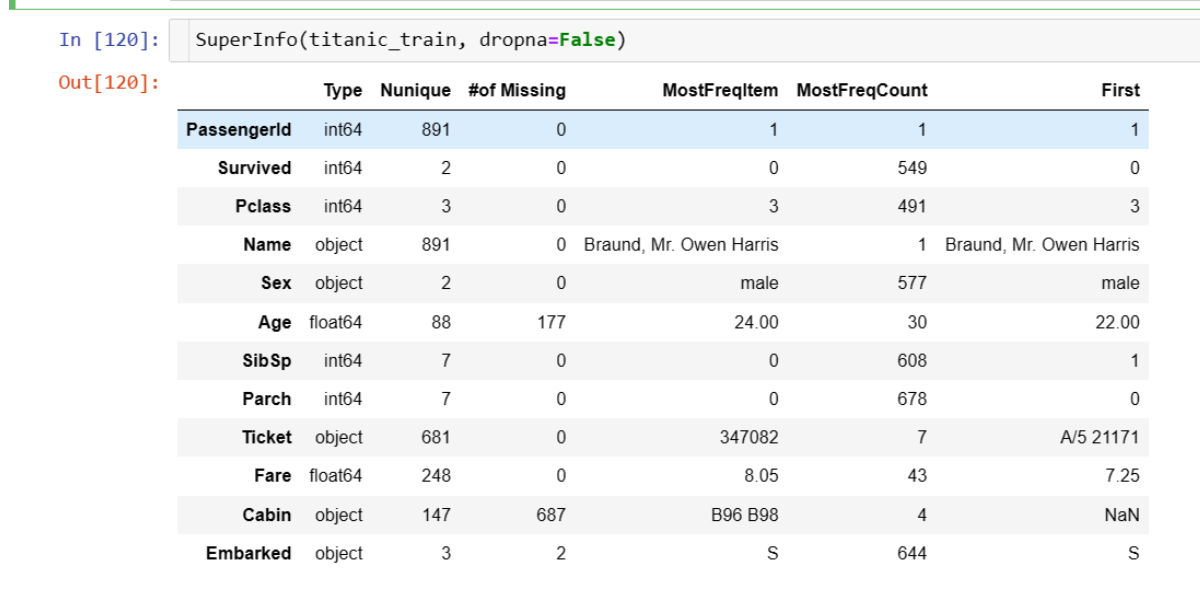

In [ ]:
# Veri setinin genel bir profilini elde etmek için
# Gözlem sayısı-veri tipi-null değer sayısı-unique değer sayısı-min-max değerleri
# null değerler "0" gözüküyor!

def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(df)

In [ ]:
def unique_values(df):
    for i in df.columns:
        if len(df[i].unique()) < 10: 
            print(i)
            print("*****unique values are*****")
            print(df[i].unique())
            print("")

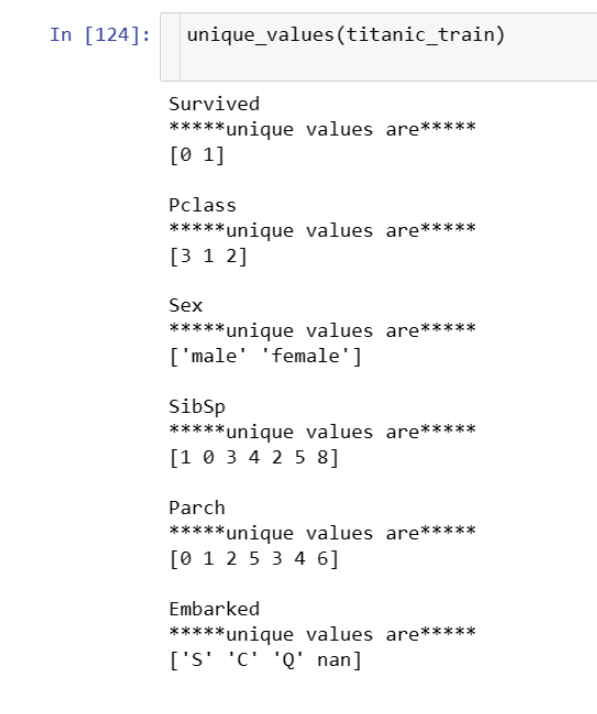

In [ ]:
def value_counts(df):
    for i in df.columns:
        if len(df[i].unique()) < 10: 
            print(i)
            print("*****values counts*****")
            print(df[i].value_counts())
            print("")

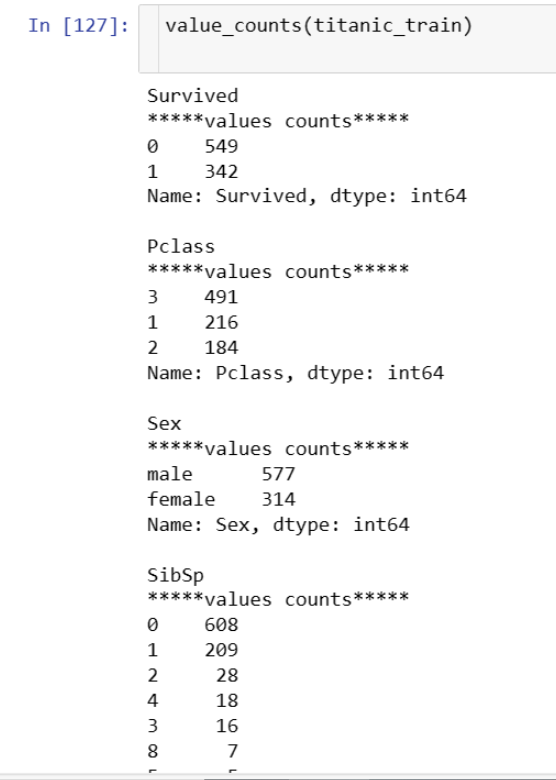

In [ ]:
 # as a list it brings all values from each column 
    for col in df.select_dtypes(include = "object"):
    print(col)
    print("")
    print(df[col].value_counts())
    print("********")

In [ ]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())
    
    
# <20 ile en soldan ":" işaretine kadar 20 karakterlik boşluk bırakılır ve feature isimleri bu boşluğa yazdırılır.
# ":" işareti tüm satırlarda aynı hizaya getirilmiş olur 

## Check Duplicate values

In [ ]:
# Veri setindeki yinelenen gözlemleri kontrol eder ve bunları kaldırır

def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")
        
duplicate_values(df)

In [ ]:
#Find the number duplicate record


print('df - Number of duplicate Record:', df.duplicated().sum())

print('df_test - Number of duplicate Record:', df_test.duplicated().sum())

## Shape

In [ ]:
# Data Frame'nin sekline bakalim;
df.shape       # Bunun sonunda () YOK

OR: 

  

7385 satir, 12 sutun var

## Columns Name

In [ ]:
# Columnslara bakalim;
df.columns   # Bunun sonunda () YOK

## Belli Bir Sutuna Bakabilmek Icin

In [ ]:
df["Vehicle Class"]

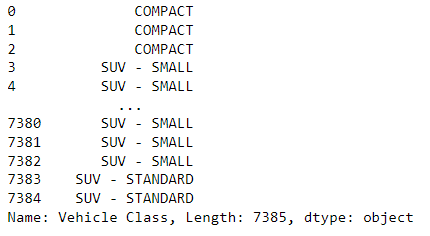

## Sutun Adlarini Degistirebilmek Icin

In [ ]:
# let's edit column names
renamed_columns = {
    'Make' : "make",
    'Model' : 'model',
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Cylinders': 'cylinders',
    'Transmission' : 'transmission',
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2' }
df.rename(renamed_columns, axis='columns', inplace=True)

In [ ]:
# 'pred' sütununu 'Survived' olarak yeniden adlandırma
df_submit.rename(columns={'pred': 'Survived'}, inplace=True)

# 'PassengerId' sütununu index olarak ayarlama
df_submit.reset_index(inplace=True)

### Bir sutunun icindeki kelimeleri  degistirmek

In [ ]:
## merge similar titles  

map_dict = {"Ms":"Miss", "Mme":"Mrs", "Sir": "Mr", "Jonkheer":"Mr", "Lady":"Mrs", "Don":"Mr", "Dona":"Mrs","Mlle":"Miss", "Col":"Soldier", "Capt":"Soldier","Major":"Soldier"}
df["Title"] = df["Title"].apply(lambda x : map_dict[x] if x in map_dict else x) 

In [ ]:
# Convert the string values to integers (Encoding)

for data in [df]:
    
    data["Sex"]=data["Sex"].map({"female":1, "male":0})
    
    data["Embarked"]=data["Embarked"].map({"S":0, "C":1, "Q":2})
    
    data["Title"]=data["Title"].map({"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":4, "Rev":5, "Soldier":6, "the Countess":7}).astype(int)

## Unique Values

In [ ]:
# Veri seti hakkinda detayli bilgi almak icin (Mert Bey'den);

def get_unique_values(df):
    
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 5:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

get_unique_values(df)

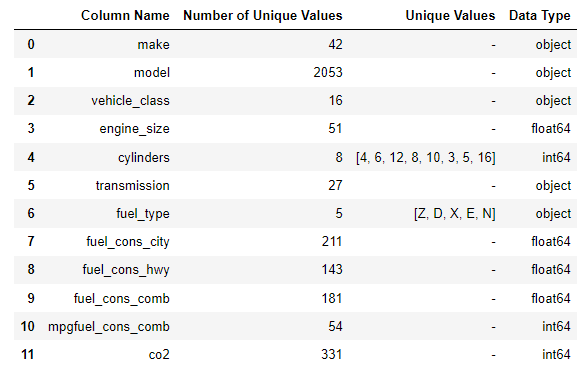

### Bir sutundaki unik degerlerin toplami

In [ ]:
df.make_model.value_counts()     #Bu kod, bir Pandas DataFrame'deki make_model sütunundaki benzersiz değerlerin sayısını hesaplar. value_counts() fonksiyonu, belirli bir sütundaki her bir benzersiz değerin kaç kez tekrarlandığını gösteren bir Seri (Series) döndürür.

## Null Value Check & Handling

In [ ]:
# Veri setinde eksik deger olup olmadigini istersek bu sekilde kontrol edebiliriz;
df.isnull().sum()

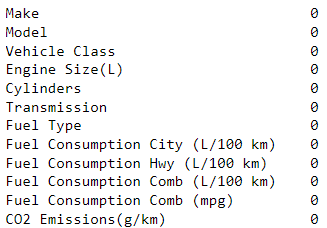

In [ ]:
# Eger sadece null value olan satirlari getirmesini istersek; 
df.isnull().sum()>0

#Alternatif:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

In [ ]:
# Alternatif kod;
df.isnull().sum()[df.isnull().sum() > 0]
titanic_train.isnull().sum()[titanic_train.isnull().sum() > 0]

In [ ]:
# Veri setindeki null değerleri tespit eder, sayı ve yüzde olarak sıralar

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending = False)
    missing_percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
    missing_values = pd.concat([missing_number, missing_percent], axis = 1, keys = ['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number'] > 0]

missing_values(df)

In [ ]:
titanic_test[titanic_test["Fare"].isna()]

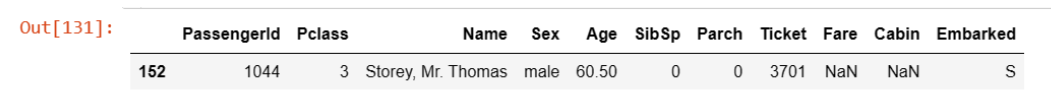

In [ ]:
titanic_test["Fare"][titanic_test["Pclass"]==3]

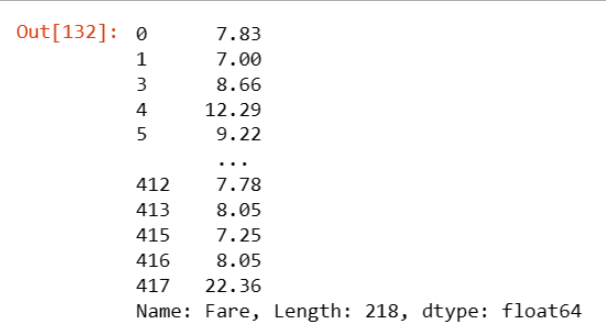

In [ ]:
# want to see percentage of null value

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

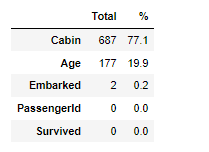

In [ ]:
# Null değerlere sahip olan satırları bulmak için
df[df.isna().any(axis=1)]

# Alternatief
df.isnull().any().sum()

### Null Value Check with msno.matrix

In [ ]:
msno.matrix(titanic_train);

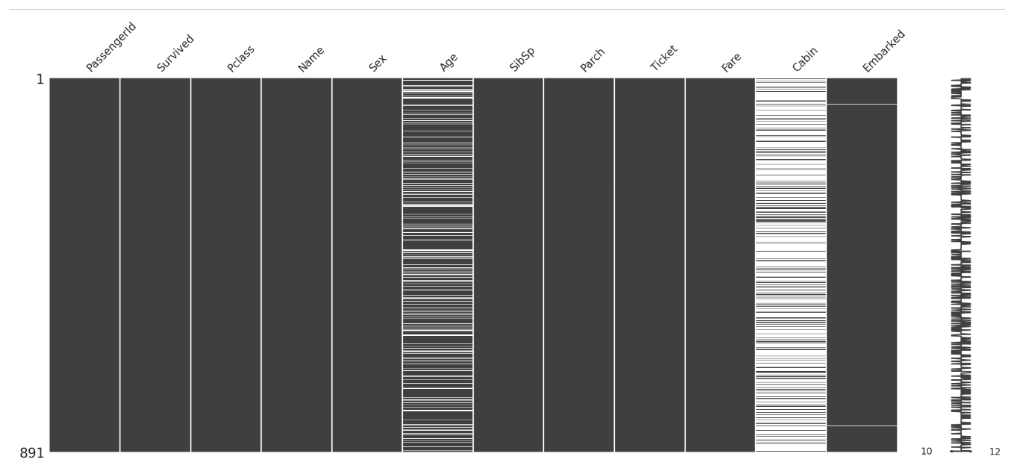

In [ ]:
# missing valueslari gosterir. 
msno.bar(df); 

### Data Setindeki noktalama isaretlerini NaN yapmak

In [1]:
# Veri setindeki tüm '?' değerlerini NaN ile değiştirir

df.replace(to_replace='?',value=np.nan,inplace=True)

df=df.applymap(lambda x: np.nan if x=='?' else x)


#for the whole dataset

df=df.replace("?", "Unknown")

df.replace({"?": "Unknown", "!": "aa"})
df.workclass.replace("?", "Unknown", inplace=True)


#Change “Not in family”, “other-relative” and “np.nan” with “Unmarried”
df.relationship = df.relationship.replace(["Not-in-family", "Other-relative",np.nan], "Unmarried")
df.relationship

df.isin(["?"]).sum() 

NameError: name 'df' is not defined

In [ ]:
import re

pattern = re.compile(r'[^a-zA-Z0-9 .,]')
df['occupation'] = df['occupation'].replace(pattern, "", regex=True)
df['title'] = df['title'].replace(pattern, "", regex=True)

Bu kod parçası, veri çerçevesindeki ('df') iki sütunda (`occupation` ve `title`) belirli karakterleri kaldırmak için kullanılıyor. İşte bu kodun adım adım açıklaması:

1. `import re`: Python'un düzenli ifadelerle (regular expressions) çalışma kütüphanesi olan `re`'yi içe aktarır.

2. `pattern = re.compile(r'[^a-zA-Z0-9 .,]')`: Bu, bir düzenli ifade (regex) paterni oluşturur. Patern, aşağıdakileri eşleştirir:
   - Küçük harf (a-z)
   - Büyük harf (A-Z)
   - Sayılar (0-9)
   - Boşluk (" ")
   - Nokta (.)
   - Virgül (,)
   
   Ancak önemli olan, bu karakterlerin **dışında** kalan tüm karakterleri eşleştiren `[^...]` yapısıdır. Bu, bu karakterler dışında kalan tüm karakterleri bulmak için kullanılır.

3. `df['occupation'] = df['occupation'].replace(pattern, "", regex=True)`: "occupation" sütununda, belirtilen paternle eşleşen tüm karakterleri boş bir string ("") ile değiştirir. Bu, efektif olarak bu karakterleri sütundan kaldırır.

4. `df['title'] = df['title'].replace(pattern, "", regex=True)`: Aynı işlemi "title" sütunu için de gerçekleştirir.

Sonuç olarak, bu kod parçası "occupation" ve "title" sütunlarındaki a-zA-Z0-9 ., dışındaki tüm karakterleri kaldırır. Bu, veri önişleme aşamasında metin verisini temizlemek için sıkça kullanılan bir yaklaşımdır.

### Eksik degerleri doldurma

In [ ]:
df['workclass'] = df['workclass'].fillna('Private')
#bu kod, "workclass" sütunundaki tüm eksik değerleri "Private" olarak değiştirir. Bu genellikle veri önişleme aşamasında, eksik değerlerin nasıl ele alınacağına dair bir karar olarak kullanılır. Bu örnekte, eksik değerlerin "Private" kategorisine ait olduğu varsayılmıştır ve bu şekilde doldurulmuştur.

In [ ]:
df['occupation'] = df['occupation'].fillna(method='bfill')


# bfill (backward fill), eksik değerleri bir sonraki mevcut değerle doldurur. 
# ffill (forward fill), eksik değerleri bir önceki mevcut değerle doldurur. 

In [ ]:
# eksik satırlara  average monthly income eklemek için
df["MonthlyIncome"].fillna(df.MonthlyIncome.mean(), inplace = True) 

In [2]:
#Butun null degerleri o sutunun "mode" ile dolduruyor. 

from sklearn.impute import SimpleImputer


fill_null= SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for col in df.columns:
    df[[col]] = fill_null.fit_transform(df[[col]])

C:\Users\filiz\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\filiz\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\filiz\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


NameError: name 'np' is not defined

## Bir sutunun normalize edilmiş değerlerini döndürmek

In [ ]:
df['native.country'].value_counts(normalize=True) 
#native.country sütunundaki değerlerin frekanslarını (sayılarını) hesaplar ve bu frekansları veri setindeki toplam kayıt sayısına bölerek normalize edilmiş değerlerini döndürür.

In [ ]:
value_cnt(df, 'education') # Histogram grafiginden once kullanilir genelde 

df["education-num"].value_counts(dropna=False) # Bu kod parçası, education-num sütununda hangi değerlerin ne kadar sık olduğunu ve eğer varsa eksik değerlerin sayısını görmek için kullanışlıdır.bu da NaN degerlerin sayisini da gösterir

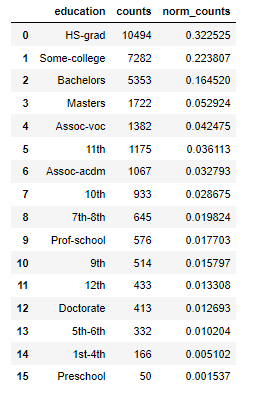

## Remove a column

In [ ]:
#remove a column, axis = 1 says that will be deleted along columns not along rows 
df.drop("education-num", axis=1, inplace=True)
df = df.drop(['Name','PassengerId', 'Ticket', 'Cabin', 'Fare', 'SibSp'], axis = 1)
df_test = df_test.drop(['Name','PassengerId', 'Ticket', 'Cabin', 'Fare', 'SibSp'], axis = 1)

In [ ]:
df.drop(index=[2614], inplace =True) 
#Bu kod, bir Pandas DataFrame'den belirli bir indekse sahip olan satırı (belirli bir satırı) kaldırmayı amaçlar.inplace =True kısmı değişikliği dataframe üzerinde gerçekleştirir ve kopyasını oluşturmaz.

## Copy

In [ ]:
# Veri setinin duzgun halinin bir yedegini alalim. 
df_new = df.copy()

In [ ]:
# Ben genelde bundan sonra tekrar datayi okutup, df'e atiyorum. Ihtiyac olursa "df_new" zaten duruyor hafizada.
df = df_new

## Extract data to_csv 

In [ ]:
# Temizlenmis datayi disa aktaralim, sonra ihtiyac oldugunda oradan okutur, buraya kadar olan islemleri yapmaya grek kalmadan devam ederiz. 
df.to_csv("Titanic_train_cleaned.csv", index=False)
df_test.to_csv("Titanic_test_cleaned.csv", index=False)

## Descrptive Statistics (Tanimlayici Istatistikler)

In [ ]:
# Numeric verilerin tanimlayici istatistiklerine bakalim;
df.describe().T

### Belirli Bir Sutundaki Degerlerin Ortalamasini Almak Icin

In [ ]:
mean = round(df["BTC"].mean(), 2) # mean of distribution

In [ ]:
# first method
print(f" maximum age: {df.Age.max()}\n minimum age: {df.Age.min()}\n average age: {df.Age.mean()}")

# second method
age = df["Age"].agg(["min","max","mean"])
age

# third method
df[["Age"]].describe().T

### Belirli Bir Sutundaki Degerlerin Standart Sapmasini Almak Icin

In [ ]:
std_sap = round(df["BTC"].std(), 2) # standard deviation of distribution

### Object Sutunlarin Descripe na bakmak

In [ ]:
df.describe(include="object").T

## Correlation Analysis

In [ ]:
df.corr()

### Sadece Sayisal Degerler Arasindaki Korelasyona Bakmak 

df.corr() dedigimizde hata liyorsak da u kod kullanilabilir.

In [ ]:
# Comment on the correlation between UAL and P&G.

sd_returns.select_dtypes("number").corr()

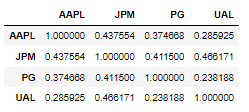

### Target vs Feature Corrolation

In [ ]:
df.corrwith(df["Survived"], numeric_only=True)
#u kod parçası "Survived" sütunuyla diğer tüm nümerik sütunlar arasındaki korelasyon değerlerini döndürür.

In [ ]:
corr_by_price = df.corr()["price"].sort_values()[:-1]
corr_by_price

# datamızdaki tüm featurların target ile olan corr.larına bakıyoruz
# targetımız olan price ile corr.larını küçükten büyüğe sıralıyoruz. 
# Targetın kendisiyle olan corr.unu görmek istemediğimizden slicelama ([:-1]) yapıp -1 ile targetı ignore ediyoruz.

In [ ]:
# Filter only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate correlation values with the 'Survived' column
correlation = numeric_cols.corrwith(df["Survived"]).drop("Survived", errors='ignore')

# Sort correlation values in descending order
sorted_corr = correlation.sort_values(ascending=False)

print(sorted_corr)

In [ ]:
# Calculate correlation values
correlation = df.corrwith(df["Survived"], numeric_only=True).drop("Survived")
# Bu kod parçası "Survived" sütunuyla diğer tüm nümerik sütunlar arasındaki korelasyon değerlerini döndürür, fakat "Survived" sütununun kendi kendisiyle olan korelasyonunu sonuçtan çıkarır.

# Sort correlation values in descending order
sorted_corr = correlation.sort_values(ascending=False)

# Visualize
plt.figure(figsize=(10,6))
bars = plt.bar(sorted_corr.index, sorted_corr.values, color="skyblue")

# Add the correlation value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=9)

plt.title("Correlation with the 'Survived' Column")
plt.ylabel("Correlation Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

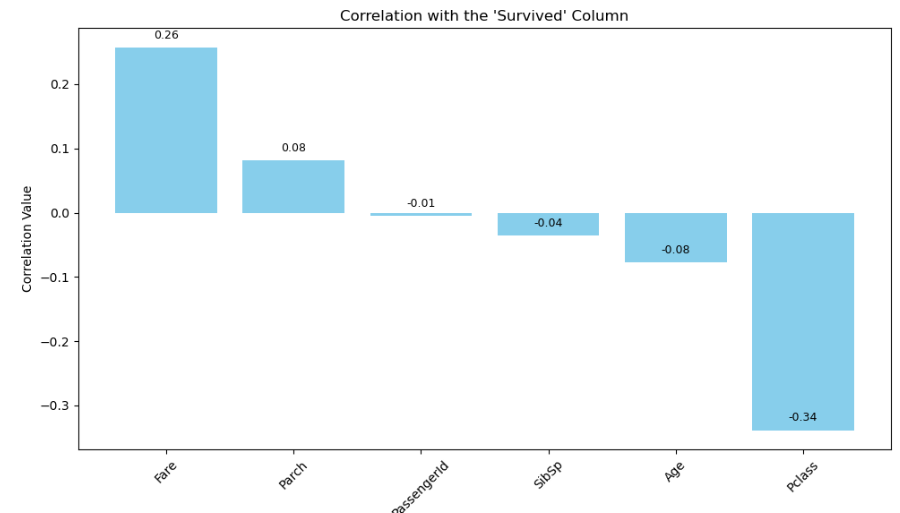

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

# featureler ile target arasındaki corr.ları görselleştiriyoruz.

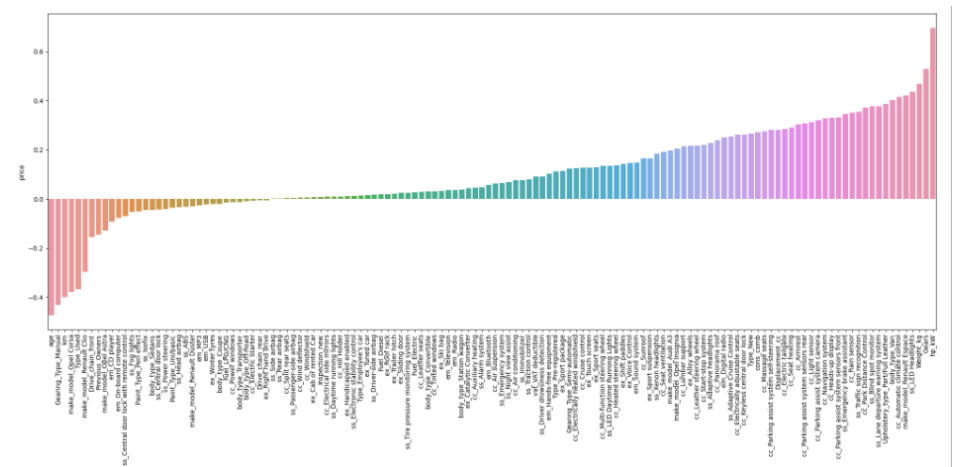

In [ ]:
# Classlarımızı ayırmaya yarayacak bir insight ede edebilir miyiz ona bakıyoruz

fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.kdeplot(df[col])
plt.tight_layout();

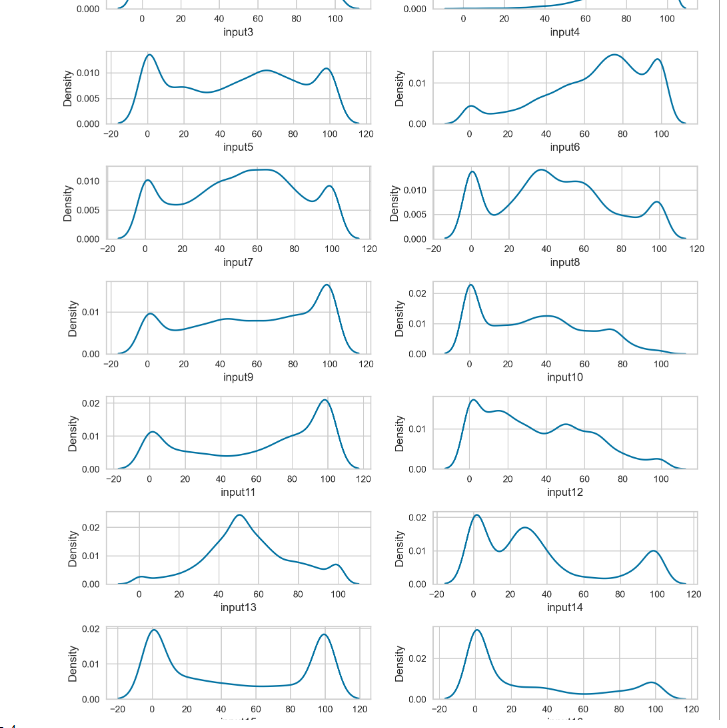

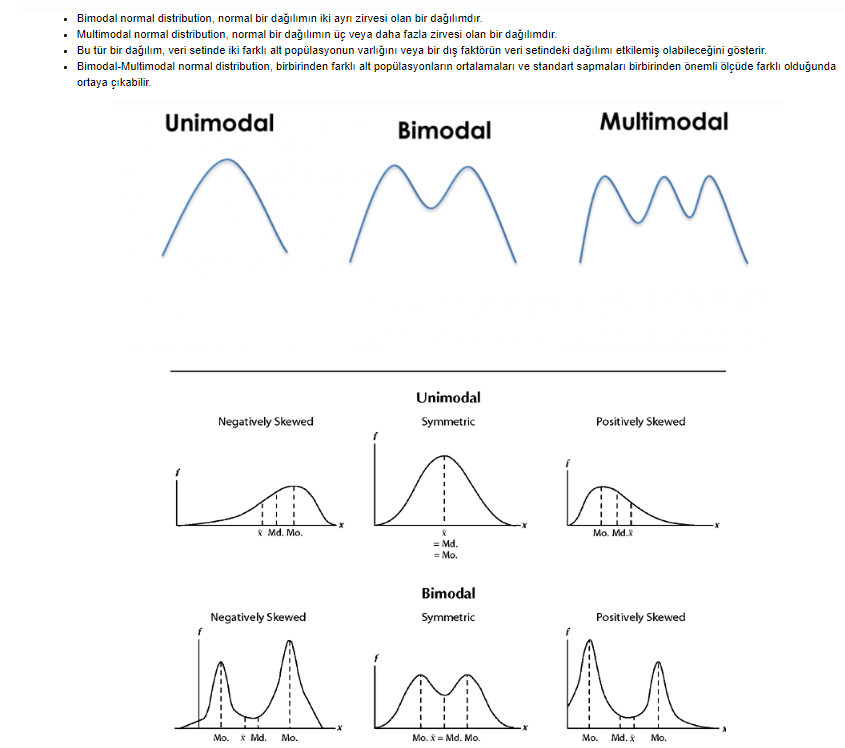

## Bir sutundaki bellirli araliktaki degerlerin toplam sayisi

In [ ]:
# haftalık çalışma saati 72'den fazla olan bireylerin toplam sayısı

len(df[df["hours.per.week"]>72]) 


# haftalık çalışma saati 20'den az olan bireylerin toplam sayısı

len(df[df["hours.per.week"]<20])  


# haftalık çalışma saati 72'den fazla olan veya 20'den az olan bireylerin toplam sayısı

len(df[(df["hours.per.week"] > 72) | (df["hours.per.week"] < 20)])


# haftalık çalışma saati 72'den fazla olan veya 20'den az olandan farkli  bireylerin toplam sayısı!
df = df[~((df["hours.per.week"] > 72) | (df["hours.per.week"] < 20))]

## Get dummies

**get_dummies() yöntemi, kategorik sütunları ikili kodlama yaparak yeni sütunlara dönüştürür.**

**Her bir kategori, bir özellik olarak kodlanır ve özellik varsa 1, yoksa 0 olarak kodlanır.**

In [ ]:
# Bu kod, sütunlarımızdaki her bir hücrede yer alan virgülle ayrılmış metinleri ayrıştırarak,
# bu metinlerin her bir öğesinin ayrı bir sütun olarak temsil edildiği yeni bir veri çerçevesi oluşturur.

df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [ ]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True) 
# detaylandırlığımız featurları tekrara kaçmaması için çıkardık

In [ ]:
df = pd.get_dummies(df, drop_first =True)
df.head()

# drop_first=True parametresi, her bir özelliğin ilk kategorisine ait sütunu kaldırır. 
# Bu, overfitting ve multicollinarity önlemek için yapılır.

# Örneğin, "Fuel_Type" sütununda "Diesel", "Gasoline" ve "LPG" gibi üç kategori varsa, sütunlardan sadece ikisi
# (örneğin "Gasoline" ve "LPG") kodlanır ve "Diesel" kategorisi için referans olarak kullanılır.
# Bu sayede, "Gasoline" sütunu ve "LPG" sütunu, "Diesel" sütunu ile ilişkilendirilir ve herhangi bir çoklu doğrusal
# bağımsızlık sorununun önlenmesi sağlanır.

# Visualization

## Heatmap

In [ ]:
# En basit hali; 
sns.heatmap(df.corr(), annot = True);  #  annot = True; Hucrelerin icine Pearson korelasyon katsayilarinin yazilmasini sagliyor. 

In [ ]:
#  Biraz detayli; 
sns.heatmap(sd_returns.select_dtypes("number").corr(), cmap="cubehelix_r", annot=True);

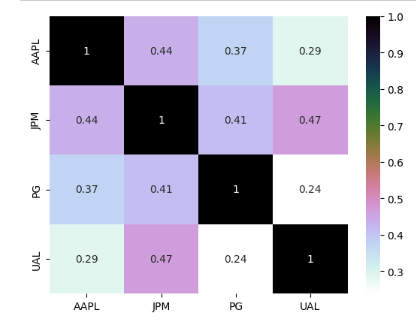

In [ ]:
sns.heatmap(df_numeric.corr(), annot =True); 
# numeric verilerin featuresları arasındaki korelasyonlarla bir heat map çıkarır.

In [ ]:
# Mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Setting up the figure and axis
plt.figure(figsize=(12, 9))

# Drawing the heatmap
sns.heatmap(df.corr(), annot=True, mask=mask, cmap="coolwarm", 
            vmax=1, vmin=-1, linewidths=.5, cbar_kws={"shrink": 0.75})

# Title
plt.title("Correlation Heatmap (Diagonal)")

plt.show()

In [ ]:
# Sag ust kismi kapatarak cizmek;

corr = df2.select_dtypes("number").corr()
mask = np.zeros_like(corr) # zeros matrix fill the cells with 0.
mask[np.triu_indices_from(mask)] = True 
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="autumn_r", annot = True)

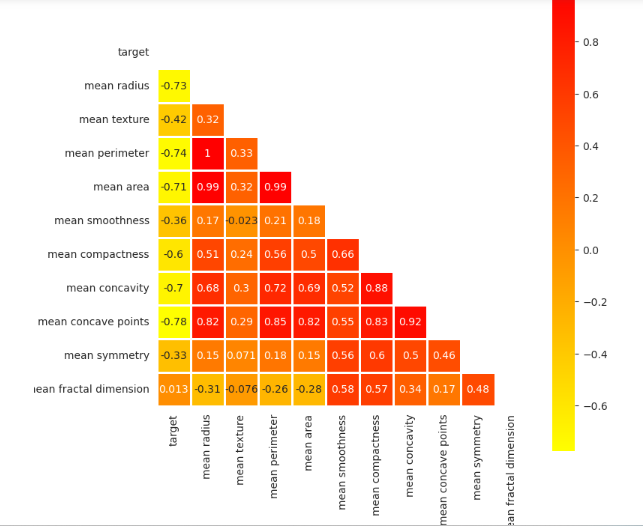

In [ ]:
# Mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Setting up the figure and axis
plt.figure(figsize=(12, 9))

# Drawing the heatmap
sns.heatmap(df.corr(), annot=True, mask=mask, cmap="coolwarm", 
            vmax=1, vmin=-1, linewidths=.5, cbar_kws={"shrink": 0.75})

# Title
plt.title("Correlation Heatmap (Diagonal)")

plt.show()

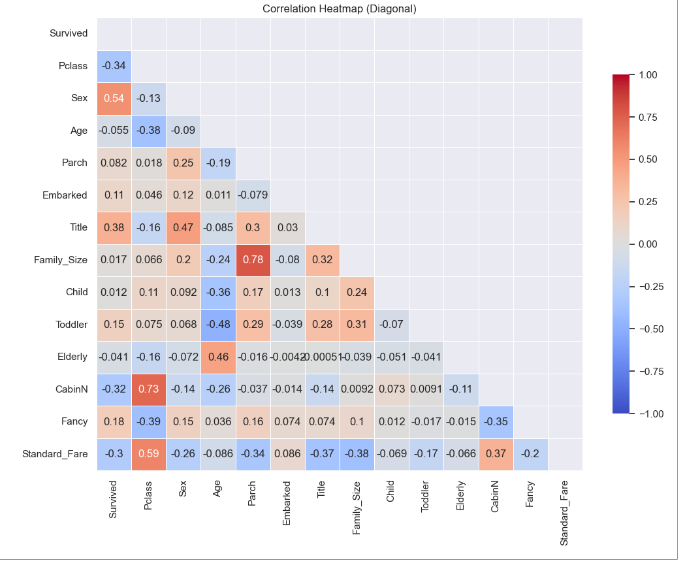

### Multicollinearity kontrolünü 

In [ ]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

# +0.9 ile +1 arasındaki corr. değerleri için multicollinearity kontrolünü bu kod ile yapabiliriz.



df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

# -0.9 ile -1 arasındaki corr. değerleri için multicollinearity kontrolünü bu kod ile yapabiliriz.

## Sutun Grafigi (Bar grafigi) 

In [ ]:
# Let's print out countplot to know how many samples belong to class #0 and #1

plt.rcParams['figure.facecolor'] = "#ffffa8"
plt.rcParams['axes.facecolor'] = "#ffffd2"
plt.figure(figsize=(8,5))
plt.title( "0: Healty,  1: Cancer")
sns.countplot(x=df["target"],palette='inferno')
plt.show()

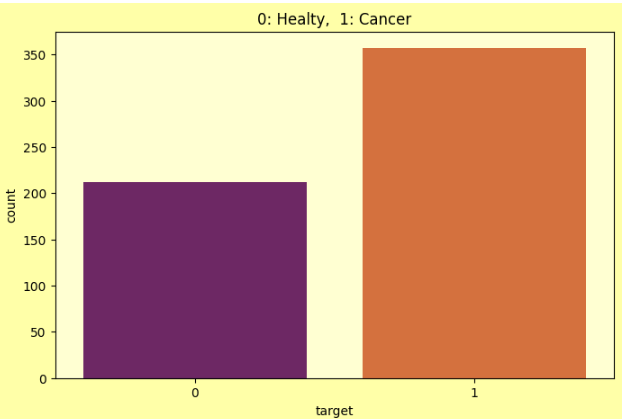

In [ ]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y = df['workclass'], hue = df['income'])
plt.title("Income by workclass", fontsize = 16)
ax.bar_label(ax.containers[0]);

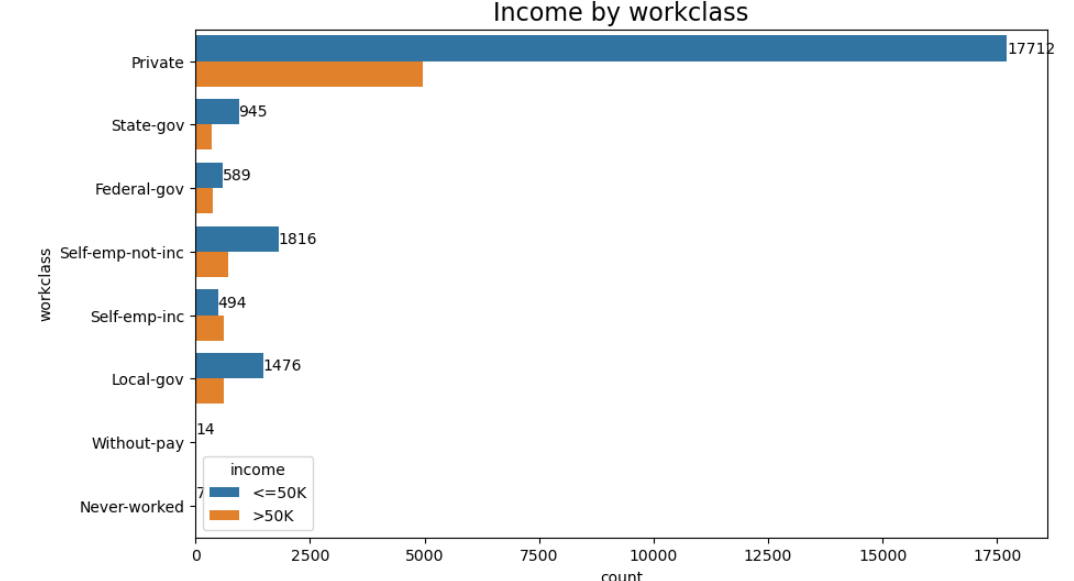

In [ ]:
ax = sns.countplot(data=df, x="Sex", hue="Survived")

for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100 / df.shape[0]:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0,5),
                textcoords='offset points')

plt.show()

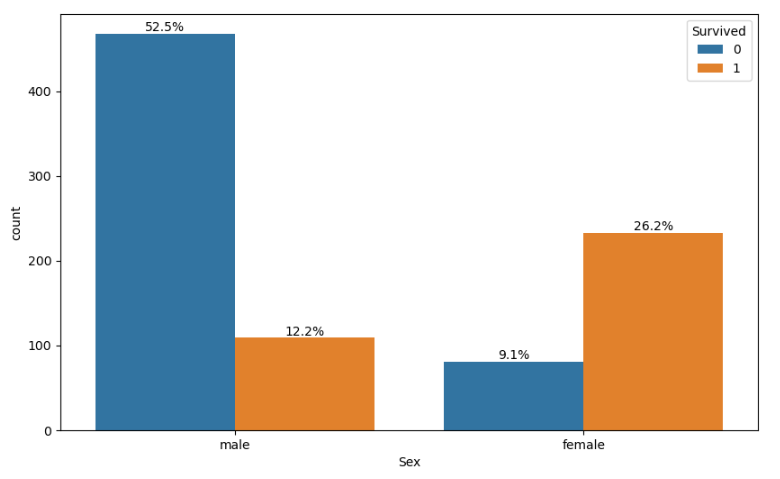

In [ ]:
ax = sns.countplot(data=df, x="Pclass", hue="Survived")

# Calculate and annotate the percentages on top of the bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}%'.format(height / total * 100),
            ha="center")

plt.show()

In [ ]:
plt.figure(figsize=(8,6))

# Using default palette for bars
ax = sns.countplot(x=df.Family_Size, hue='Survived', data=df)

plt.xlabel('Family_Size', fontsize=12)
plt.ylabel('Survived', fontsize=12)
plt.title('Family size survived count', fontsize=15)

# Adding numbers on top of bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='gray', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [ ]:
fig, ax = plt.subplots(1,3)
sns.countplot(data=df, x="Child", hue="Survived", ax=ax[0])
sns.countplot(data=df, x="Toddler", hue="Survived", ax=ax[1])
sns.countplot(data=df, x="Elderly", hue="Survived", ax=ax[2])
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_importance')

plt.xticks(rotation=90);

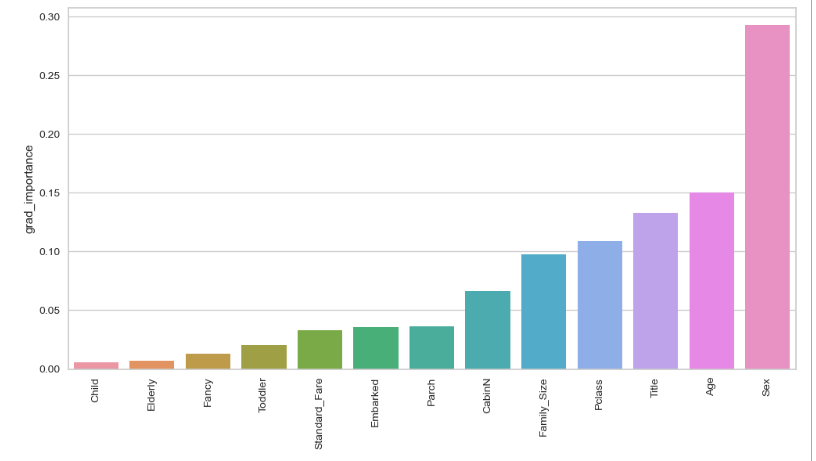

In [ ]:
ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))
    
# ax.bar_label(ax.containers[0]);         # countları ve modelleri içeren bir stun grafiği oluşturur.

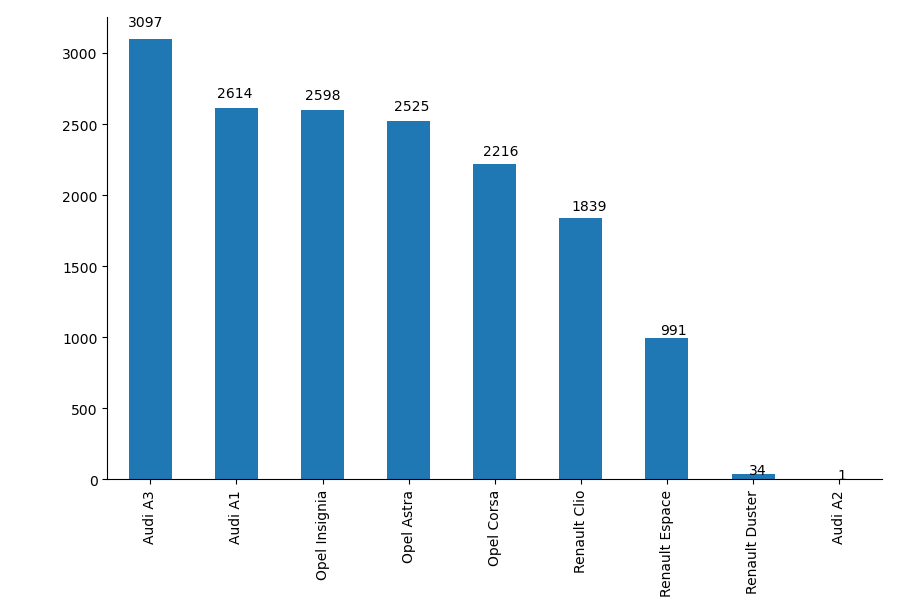

In [ ]:
# Dengeli verilere (sınıf) sahip olduğumuzu görebiliriz. 
# Ancak, ek olarak, her sınıfın yüzdelik dağılımını kontrol etmek istiyorum.

class_digit = df.groupby('class').size()
class_label = pd.DataFrame(class_digit,columns = ['Size'])
plt.figure(figsize = (8,6))
ax= sns.barplot(x = class_label.index, y = 'Size', data = class_label)
plt.bar_label(ax.containers[0]);

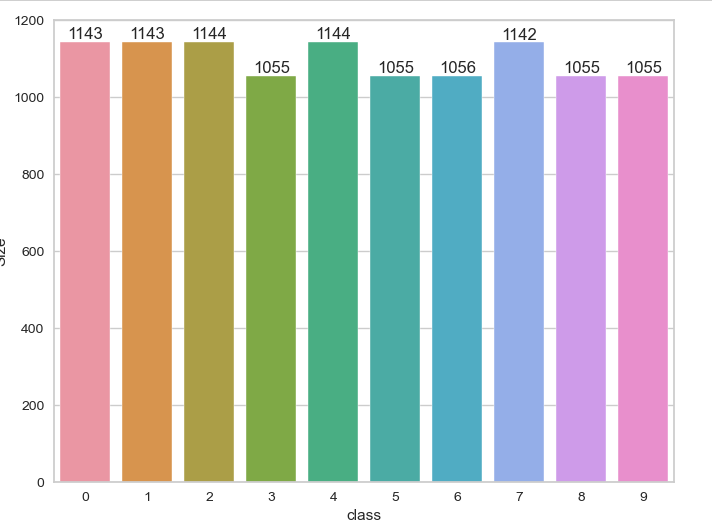

## Pairplot

In [ ]:
sns.pairplot(df, hue = "Survived", palette="Set1");

In [ ]:
# Benim (Ismet) duzenledigim, dagilimlar arasina kirmizi cizgiyi de ekleyen, pairplot kodu; 
sns.pairplot(df, kind = "reg", diag_kind = "kde", diag_kws={"color":"red"}, plot_kws={"line_kws":{"color":"red"}});

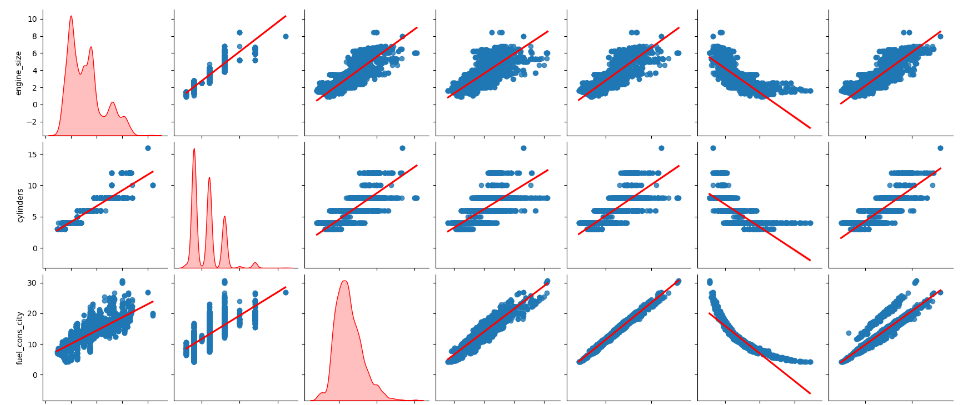

In [ ]:
sns.pairplot(df, hue = "income", corner=True);

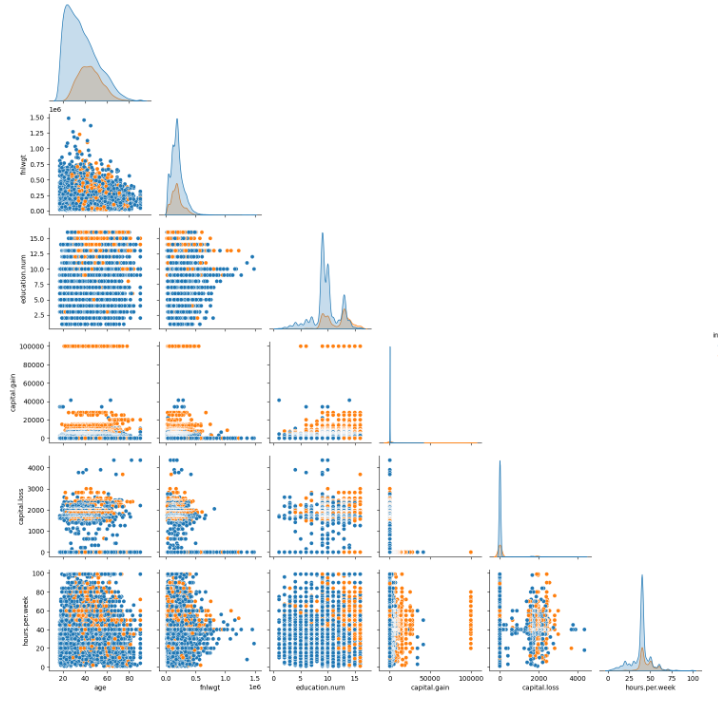

In [ ]:
# List of numerical columns we're interested in
numerical_cols = ['Age', 'Pclass', 'Fancy', 'Standard_Fare', 'Family_Size']

# Create a pair of scatter plots for the numerical columns
plt.figure(figsize=(15,15))
plot_num = 1

for i in range(len(numerical_cols)):
    for j in range(len(numerical_cols)):
        plt.subplot(len(numerical_cols), 
                    len(numerical_cols), 
                    plot_num)
        if i != j:
            sns.scatterplot(data=df, 
                            x=numerical_cols[i], 
                            y=numerical_cols[j], 
                            hue="Survived", 
                            palette="Set1", 
                            alpha=0.5)
        else:
            # Diagonal: display a histogram
            sns.histplot(df[numerical_cols[i]], 
                         kde=True, 
                         color='skyblue')
        plot_num += 1

plt.tight_layout()
plt.show()

## Boxplot

In [ ]:
 sns.boxplot(data=df,y="age",x='income');

In [ ]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Survived":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Survived',y=feature,data=df)
plt.show()

In [ ]:
# Let's draw boxplots and histplots for checking distributions of features;
index=0
for feature in df.select_dtypes('number').columns:
    index+=1
    plt.figure(figsize=(40,40))
    plt.subplot((len(df.columns)),2,index)
    sns.boxplot(x=feature,data=df, whis=3) 
        
    plt.tight_layout()
    
    plt.show()

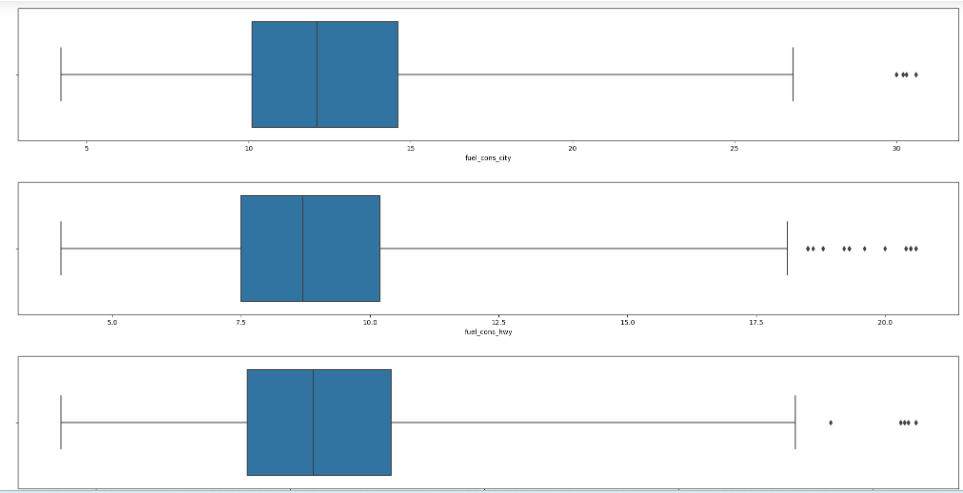

In [ ]:
features = df.columns
index = 0
plt.figure(figsize=(12, 6))

for feature in features:
    if feature != "Survived":
        index += 1
        plt.subplot(2, 7, index)
        sns.boxplot(x='Survived', y=feature, data=df)
plt.tight_layout()
plt.show()

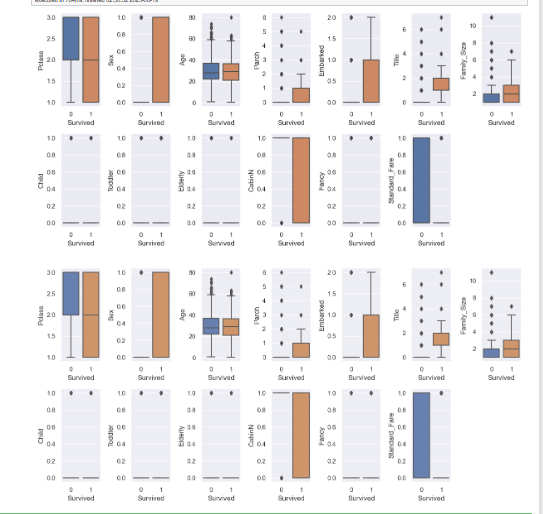

In [ ]:
# outlier detection yapıyoruz, bütün featurelar için boxplotlarını çizdiriyoruz
# 2-4 ve 13. featurelar için outlier görülüyor 

plt.figure(figsize=(10,5))
sns.boxplot(data=df.drop("class", axis=1));

In [ ]:
# yukardaki outlier değer içeren featurlardan emin olmak için classlar bazında her bir featurenın boxplotunu çiziyoruz
# kesin karar vermek için IQR değerlerine bakmak lazım 

fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.boxplot(y= df[col], x = df["class"], data=df)
plt.tight_layout();

### Outlier Tesbiti

In [ ]:
# 1.5 wisker değerine göre her bir gruba ait outlier olabileceğini değerlendirdiğimiz gözlemleri tespit ediyoruz.

total_outliers = []

for model in df.make_model.unique():
    
    car_prices = df[df["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()    
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

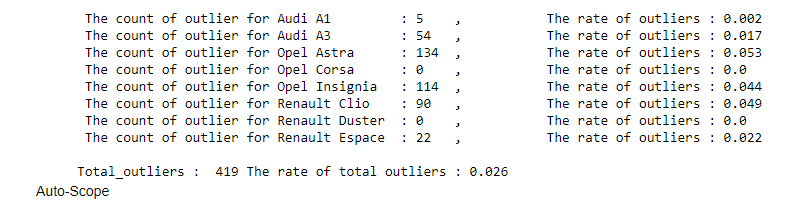

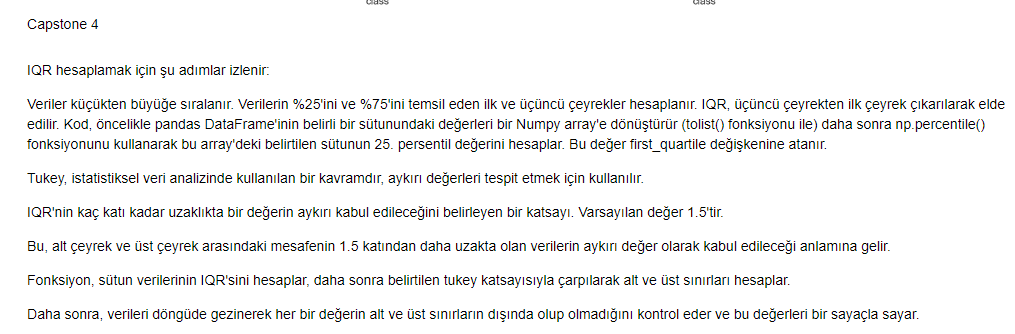

In [ ]:
# Sırasıyla her sınıf için aykırı değerlerin sayısını almak için bir fonksiyon üretebiliriz. 
# Pratiklik adına, sınıf ayrımını dikkate almadan özellikler için aykırı değerler buluyoruz.

def detect_outliers(df, col_name,tukey=1.5):
    ''' 
    this function detects outliers based on 1.5 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(tukey*IQR)
    lower_limit = first_quartile-(tukey*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [ ]:
# biz burda thresholdumuzu yani tukeyimizi 1.5 belirliyoruz

threshold = 1.5
out_cols = []
for col in df.columns:
    print(
        f"{col}\nlower:{detect_outliers(df, col,threshold)[0]} \nupper:{detect_outliers(df, col,threshold)[1]}\
        \noutlier:{detect_outliers(df, col,threshold)[2]}\n*-*-*-*-*-*-*"
    )
    if detect_outliers(df, col,threshold)[2] > 0 :
        out_cols.append(col)
print(out_cols)  

In [ ]:
# 1,5 iqr üzerindeki aykırı değerleri düşürmek için

for col in out_cols:
    df1 = df1[(df1[col] > detect_outliers(df1, col)[0])
             & (df1[col] < detect_outliers(df1, col)[1])]

In [ ]:
# class sütununda 0'dan 9'a kadar olan değerlerin kaçar kez tekrar ettiğini yazdırır.

for i in range(0,10) :
    print(f"the number of {i}--->{df[df['class'] == i].shape[0]}")

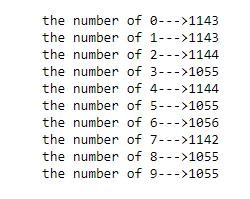

### Boxplot & Density plots

In [ ]:
## Age of the people who survived

sns.set(rc = {'figure.figsize':(16,6)})
plt.plot(figure_size = (1,2))

#Boxplots
plt.subplot(1,2,1)
bp_ax = sns.boxplot(x = "Survived",y="Age", data = df)
bp_ax.set_title('Box plot', fontsize = 20)

#Density plots
plt.subplot(1,2,2)
dp_ax = sns.displot(x = 'Age', hue = 'Survived', data = df)
dp_ax.fig.suptitle('Density plot', fontsize=20)
plt.show()


### Boxplot & Kdeplot

In [ ]:
## Fares of the survivors

sns.set(rc = {'figure.figsize':(16,6)})
plt.plot(figure_size = (1,2))

#Boxplots
plt.subplot(1,2,1)
bp_ax = sns.boxplot(x = "Survived",y="Fare", data = df)
bp_ax.set_title('Box plot', fontsize = 20)

#Density plots
plt.subplot(1,2,2)
dp_ax = sns.kdeplot(x = 'Fare', hue = 'Survived', data = df)
dp_ax.set_title('Density plot', fontsize=20)
plt.show()

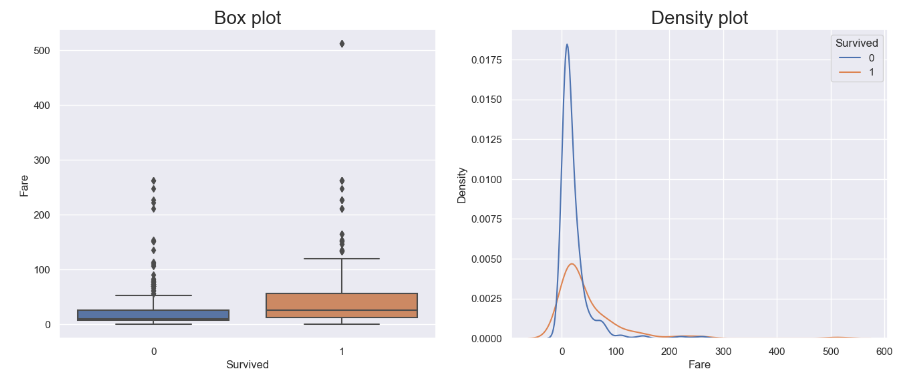

### Boxen Plot

In [ ]:
# boxenplot;

plt.figure(figsize=(20,3))
plt.title('Mean Radius')
sns.boxenplot(data=df, x="mean radius", color='g');

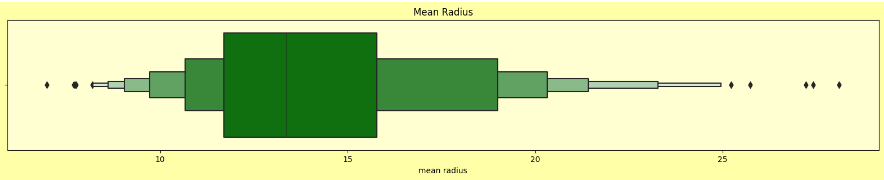

## ViolinPlot

In [ ]:
#violinplot;

plt.subplots(figsize = (12, 6))

sns.violinplot(x = "target", y = "mean area", data = df);

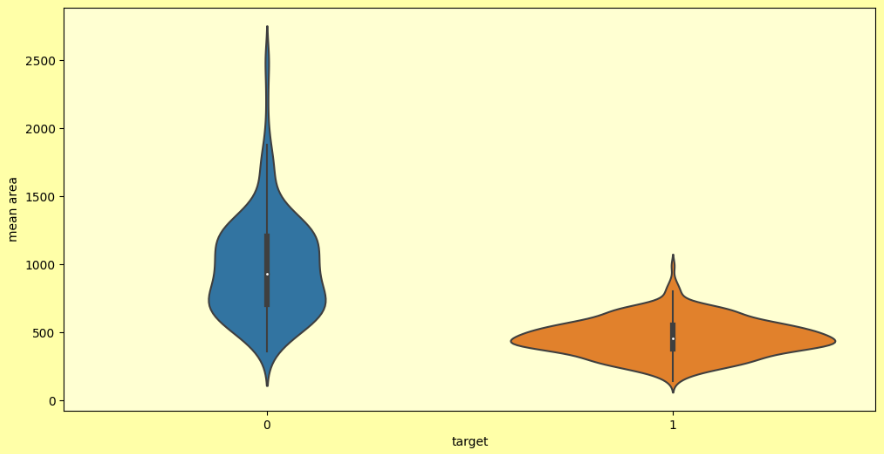

## StripPlot

In [3]:
#stripplot

plt.figure(figsize=(10,7))
plt.title('Worst Fractal Dimension')
sns.stripplot(data=df, x="target", y="worst fractal dimension");

NameError: name 'plt' is not defined

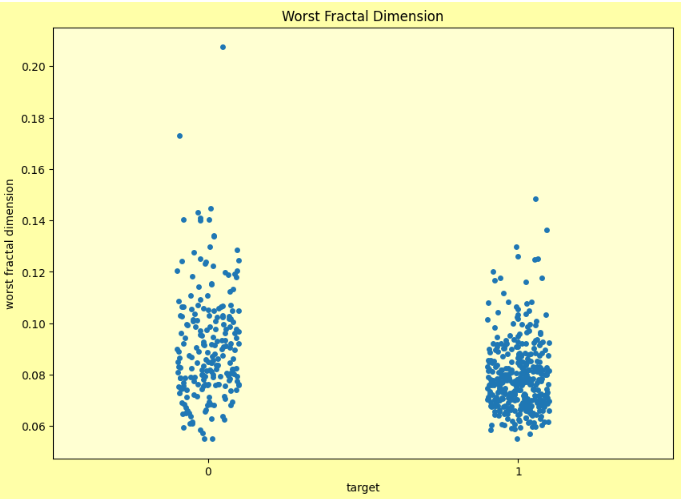

## SwarmPlot

In [ ]:
# swarmplot
plt.figure(figsize = (10,5))
sns.swarmplot(y = "worst concave points", data = df, size = 10, x = "target"); 

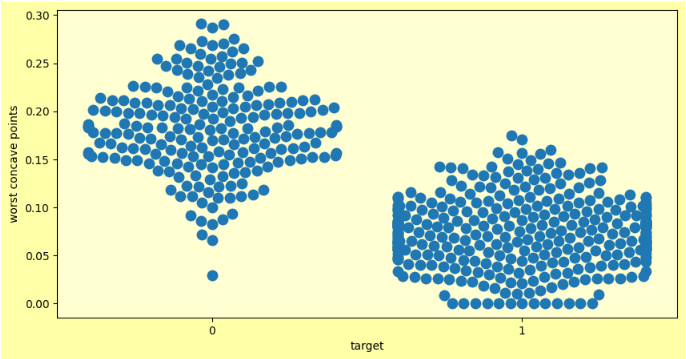

## Plotly ile Interaktif Grafik Cizmek

In [ ]:
# Bu ornek; Veri setindeki arabalarin marka, model, vb ye gore dagilimlarina bakmak icindi (Ilk 25)

for column in ['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']:
    df_column = df[column].value_counts().reset_index().rename(columns={'index': column, column: 'Count'})[0:25]
    df_column = df_column.sort_values(by='Count', ascending=False)  # Değerlere göre sıralama yapiyoruz

    fig = go.Figure(go.Bar(x=df_column[column], y=df_column['Count'], 
                           marker={'color': df_column['Count'], 'colorscale': 'Viridis'}, 
                           text=df_column['Count'], textposition="outside"))
    fig.update_layout(title_text=f'Top 25 {column}', xaxis_title=column, yaxis_title='Number of Vehicles', 
                      title_x=0.5, width=700, height=500)
    fig.show()

In [ ]:
# By using Plotly for sd_prices

# creating trace 1
trace1 = go.Scatter(
                    x = sd_prices.Date,
                    y = sd_prices.AAPL,
                    mode = "lines",                                      
                    name = "AAPL",
                    marker = dict(color = "rgb(16, 112, 2)"), # {"color" : "rgb(16, 112, 2)"}
                    text = sd_prices)
# creating trace 2
trace2 = go.Scatter(
                    x = sd_prices.Date,
                    y = sd_prices.JPM,
                    mode = "lines + markers",
                    name = "JPM",
                    marker = dict(color = "rgb(80,26,80)",
                                  size = 3,
                                  line = dict(
                                  color = "blue",
                                  width = 1),),
                    text = sd_prices.JPM)

# creating trace 3
trace3 = go.Scatter(
                    x = sd_prices.Date,
                    y = sd_prices.PG,
                    mode = "lines + markers",
                    name = "PG",
                    marker = dict(color = "rgb(80,26,80)",
                                  size = 3,
                                  line = dict(
                                  color = "red",
                                  width = 1),),
                    text = sd_prices.PG)


# creating trace 4
trace4 = go.Scatter(
                    x = sd_prices.Date,
                    y = sd_prices.UAL,
                    mode = "lines + markers",
                    name = "UAL",
                    marker = dict(color = "rgb(80,26,80)",
                                  size = 3,
                                  line = dict(
                                  color = "orange",
                                  width = 1),),
                    text = sd_prices.UAL)



data = [trace1, trace2, trace3, trace4]

layout = dict(title = "Prices of APPL, JPM, PG, UAL", #axes olarak düşünebiliriz
              xaxis = dict(title = "APPL", ticklen = 5, tickcolor = "crimson", zeroline = False),
              yaxis = dict(title = "Value", ticklen = 5, tickcolor = "crimson", zeroline = False))

fig = dict(data = data, layout = layout) 
iplot(fig) 

In [ ]:
# By using Plotly for sd_returns

# creating trace 1
trace1 = go.Scatter(
                    x = sd_returns.Date,
                    y = sd_returns.AAPL,
                    mode = "lines",    # Bu dağılım izi için çizim modunu belirler. "mode=text" ise text'i yazdırır "text" öğeleri koordinatlarda görünür. 
                                       # Aksi takdirde, fareyle üzerine gelindiğinde "text" öğeleri görünür. 
                                       # 20'den az nokta varsa ve iz yığınlanmamışsa varsayılan değer "lines+markers"dir. Aksi takdirde, "lines".
                    name = "AAPL",
                    marker = dict(color = "rgb(16, 112, 2)"), # {"color" : "rgb(16, 112, 2)"}
                    text = sd_returns)
# creating trace 2
trace2 = go.Scatter(
                    x = sd_returns.Date,
                    y = sd_returns.JPM,
                    mode = "lines + markers",
                    name = "JPM",
                    marker = dict(color = "rgb(80,26,80)",
                                  size = 3,
                                  line = dict(
                                  color = "gray",
                                  width = 1),),
                    text = sd_returns.JPM)

# creating trace 3
trace3 = go.Scatter(
                    x = sd_returns.Date,
                    y = sd_returns.PG,
                    mode = "lines + markers",
                    name = "PG",
                    marker = dict(color = "rgb(90,18,45)",
                                  size = 3,
                                  line = dict(
                                  color = "red",
                                  width = 1),),
                    text = sd_returns.PG)


# creating trace 4
trace4 = go.Scatter(
                    x = sd_returns.Date,
                    y = sd_returns.UAL,
                    mode = "lines + markers",
                    name = "UAL",
                    marker = dict(color = "rgb(10,10,10)",
                                  size = 3,
                                  line = dict(
                                  color = "yellow",
                                  width = 1),),
                    text = sd_returns.UAL)



data = [trace1, trace2, trace3, trace4]

layout = dict(title = "Returns of APPL, JPM, PG, UAL", #axes olarak düşünebiliriz
              xaxis = dict(title = "APPL", ticklen = 5, tickcolor = "crimson", zeroline = False),
              yaxis = dict(title = "Value", ticklen = 5, tickcolor = "crimson", zeroline = False))

fig = dict(data = data, layout = layout)  #figure içine yukarıda tanımladığımız grafik değişkenlerini ve layout parametrelerini dict olarak verip 
iplot(fig) 

## Fonksiyon ve for Dongusu Kullanarak Ardisik Grafikler Cizmak Icin

In [ ]:
# Bu kod bloku; Arac ozelliklerine (features) gore ortalama CO2 emisyonlarina (salinimlarina, dogaya saldiklari egsoz gazi miktarlarina) bakmak icin hazirlanmisti

#Fonksiyon tanimlayalim; 
def explore_cat_feature(feature):
    group= df.groupby(feature).mean()
    plt.figure(figsize=[15,5])
    plots = group['co2'].sort_values().plot(kind = 'bar', fontsize=15)
    plt.xlabel(feature, fontsize=15);
    plt.ylabel('Mean Co2 Emission', fontsize=15);
    plt.title("Mean Co2 Emission according to {} feature\n".format(feature), fontsize=20)
    

# Fonksiyonu for dongusu ile birlikte kullanalim;    
for feature in ['make', 'vehicle_class', 'engine_size', 'cylinders', 'transmission', 'fuel_type']:
    explore_cat_feature(feature)

## ScatterPlot

In [ ]:
# Matplotlib ile. Daha basit cizer, hue almaz;
# BTC vs ETH Matplotlib

plt.figure(figsize = (10, 5))
plt.scatter(df.BTC, df.ETH, alpha=0.6) 
plt.xlabel("BTC")
plt.ylabel("ETH")
plt.title("BTC vs ETH")
plt.show()

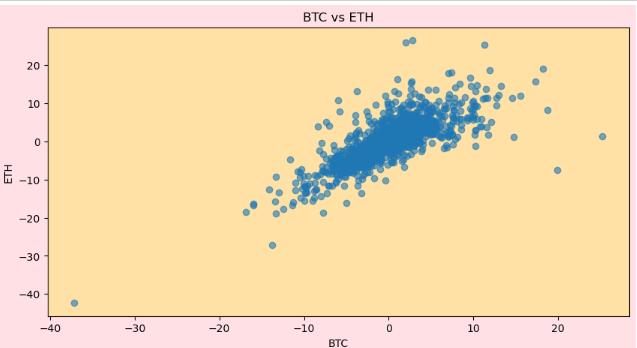

In [ ]:
# Ayni grafigi Seaborn ile cizelim (daha detayli cizer, hue de alir); 
plt.figure(figsize=(10,5))
sns.scatterplot(x = df.BTC, y = df.ETH, data = df)
plt.title("BTC and ETC")

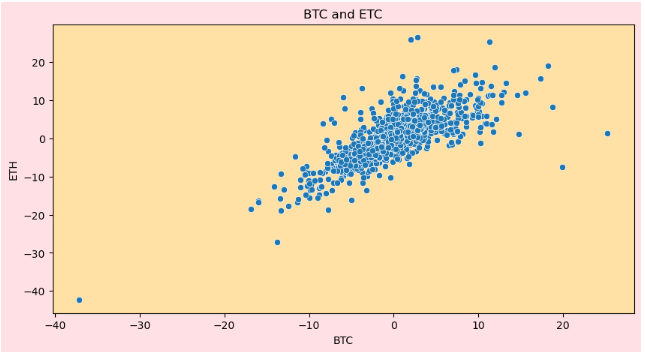

In [ ]:
# Seaborn ile (daha detayli cizer, icine hue de verilebilir)
sns.scatterplot(x="engine_size", y="co2", data=df, hue="fuel_type");

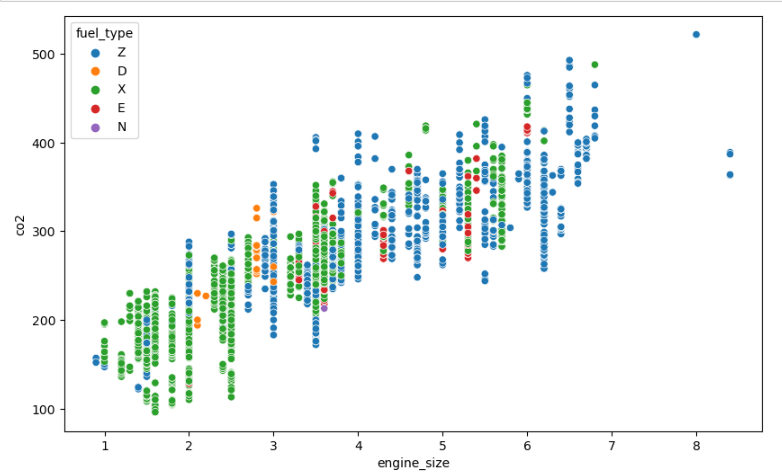

In [ ]:
# Dagilimin arasina trend dogrusu da eklemek istersek; 
# Let's add  a trend line to this graph; 

plt.figure(figsize=(10,5))
sns.regplot(x = df.BTC, y = df.ETH, data = df)
plt.title("BTC and ETC")

plt.show();

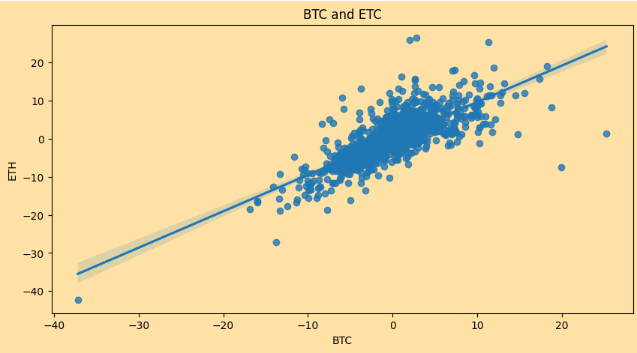

**Dagilim grafiklerinin yorumlanmasi icin guzel bir gorsel;**

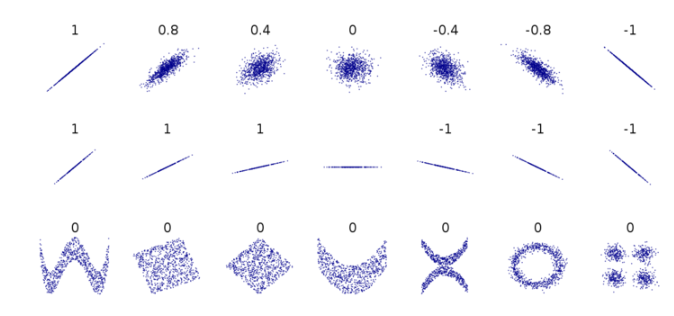

## PiePlot

In [ ]:
# Use matplotlib to plot a pie chart 
crypto_df.plot.pie(y = 'allocation %',shadow=True, figsize = (8, 8), autopct='%1.f%%')
plt.title('CRYPTO PORTFOLIO PIE CHART');

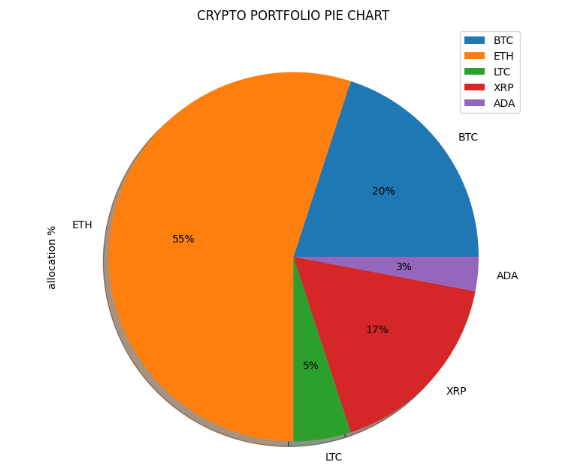

In [ ]:
# Plot the pie chart
# Burada "explode =[0, 0, 0, 0.05, 0]" grafigin belirli diliminin ayrik durmasini sagliyor
crypto_df2.plot.pie(y = 'allocation %', figsize = (8, 8), explode =[0, 0, 0, 0.05, 0], autopct='%1.1f%%')
plt.title('CRYPTO PORTFOLIO PIE CHART');

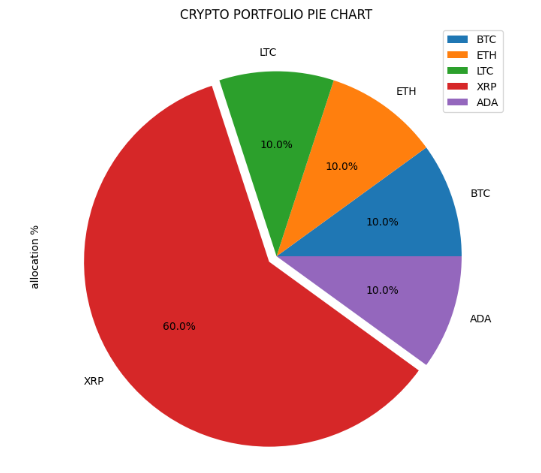

In [ ]:
# Dynamic version of portfolio allocation;
# I am waiting an increase in XRP and I made a decision to allocate 60% of my assets in it. 
# I shared rest of my equtied among other coins (BTC, LTC, ADA, and ETH).  
crypto_df2 = pd.DataFrame(data = {'allocation %':[10, 10, 10, 60, 10]}, index = ['BTC', 'ETH', 'LTC', 'XRP', 'ADA'])
crypto_df2

In [ ]:
# Dynamic version of portfolio allocation (Ust satirdaki sayilar degistirildiginde yine %60'i ADA, digerleri %10 olacak sekilde dagitip, grafigi cizdirir.);

invest_sum = crypto_df['allocation %'].sum()
crypto_df['allocation %']['XRP'] = crypto_df['allocation %'].sum()*0.60
allocation_sum = invest_sum - crypto_df['allocation %']['XRP']
num_cryptos = len(crypto_df['allocation %']) - 1  # excluding 'XRP'
allocation_percent = allocation_sum / num_cryptos
# Update the allocation percentage for each cryptocurrency
for crypto in crypto_df['allocation %'].index:
    if crypto != 'XRP':
        crypto_df['allocation %'][crypto] = allocation_percent

In [ ]:
crypto_df2.plot.pie(y = 'allocation %', figsize = (8, 8), explode =[0, 0, 0, 0.06, 0], autopct='%1.1f%%')
plt.title('CRYPTO PORTFOLIO PIE CHART');

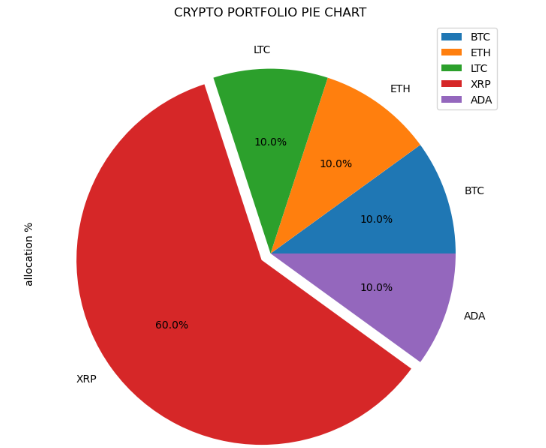

In [ ]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_axes([0,0,1,1])
ax.axis("equal")
l=["C=Cherbourg", "Q=Queenstown", "S=Southampton"]
s=[0.553571, 0.389610, 0.336957]
ax.pie(s, labels=l, autopct="%1.2f%%")
plt.show()

## LinePlot

In [ ]:
# Prices of Crypto Currencies;
plt.figure(figsize=(15,6))

l1 = plt.plot(df.Date, df.BTC)
l2 = plt.plot(df.Date, df.ETH)
l3 = plt.plot(df.Date, df.ADA)

plt.xlabel("Date")
plt.ylabel("Returns")
plt.title("Returns of Crypto Currencies")

plt.legend((l1, l2, l3),('BTC','ETH', 'ADA'), loc = 'best')

plt.plot()

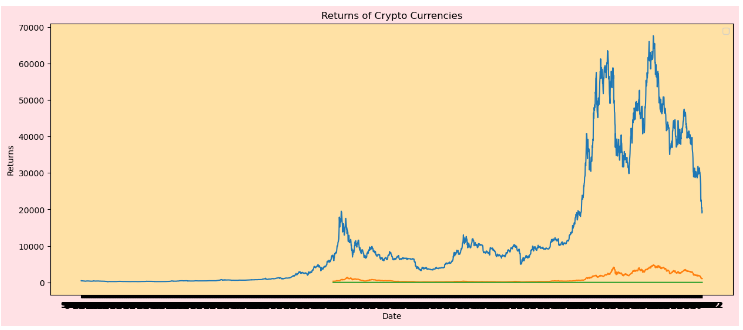

In [ ]:
# Daha gelismis hali;

# Using Pandas, plot lineplots that display all 4 stocks daily prices on one single figure.

sd_prices.plot(x = 'Date', y = ['AAPL', 'JPM', 'PG','UAL'], 
               label = ['AAPL', 'JPM', 'PG','UAL'], 
               subplots = False, figsize = (13, 6), 
               color = ['blue', 'red', 'orange','green'])
plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.title('Daily Prices of Stocks')
plt.legend(loc = 'best')
plt.show()

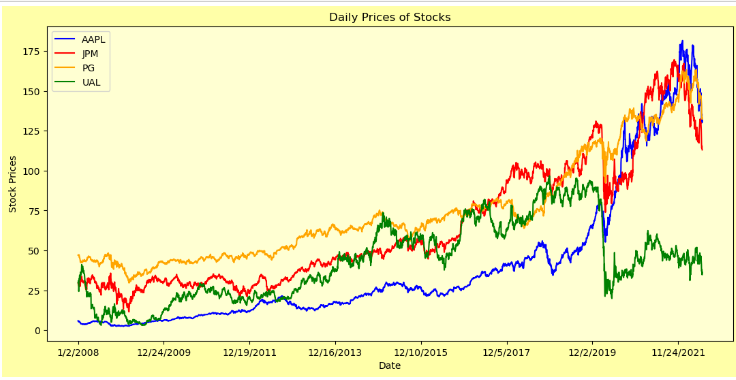

## KDE ile Distribution Plot

In [ ]:
# Let's look at the distributions of series;

df_con = ["BTC","ETH", "ADA"]

for i in df_con:
    sns.kdeplot(data = df, x = i, fill = True, linewidth = 2)
    plt.show()

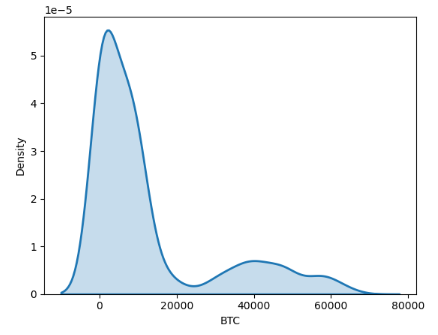

## HistPlot

In [ ]:
# Using Matplotlib, plot the histogram for United Airlines and P&G returns using 40 bins with red color. 
# Display the mean and Standard deviation for both stocks on top of the figure. What did you conclude from this graph?

df_con = ["UAL","PG"] 

for i in df_con:
    sns.histplot(data = sd_returns, x = i, fill = True, linewidth = 2, color="red", bins=40, legend = "aaa")
    plt.title(i)
    
    plt.show()

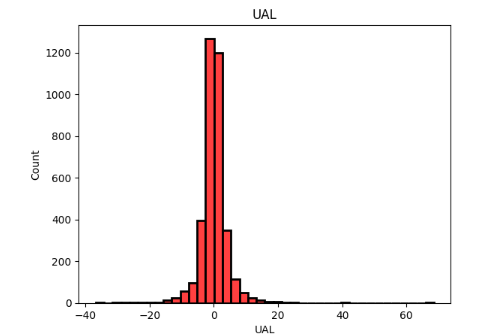

In [ ]:
# For BTC (by Pandas);

plt.figure(figsize=(10, 5))
df['BTC'].plot.hist(bins = 40, color = 'b', alpha = 0.7, figsize = (12, 6), edgecolor='white', lw=2) # kde=True It doesn't work on Pandas. It works in Matplotlib and Seaborn.
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.title("BTC: Mean=" + str(mean) + ", std_sap=" + str(std_sap))
plt.legend()

plt.show()

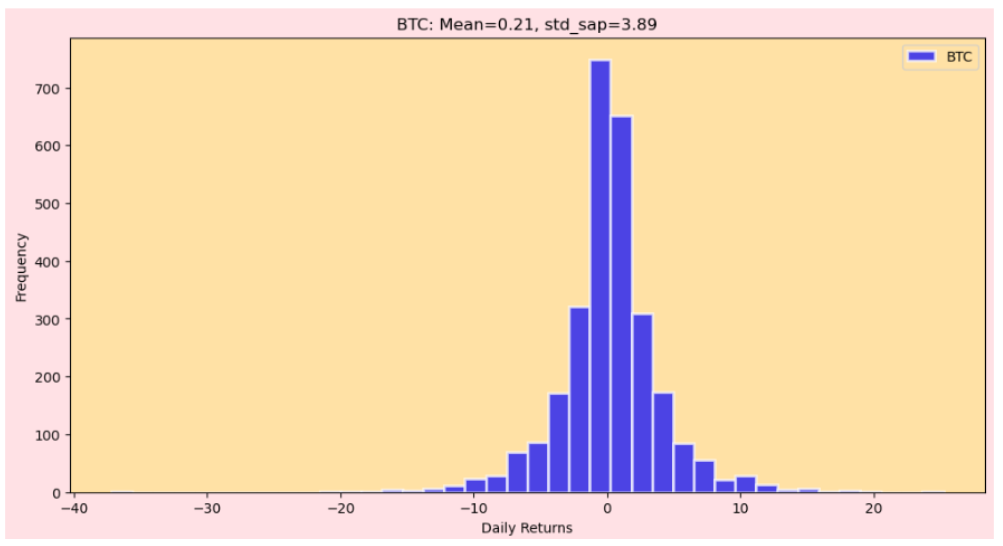

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(titanic_test["Fare"][titanic_test["Pclass"]==3], bins=30, color='blue', alpha=0.7)
plt.title("Fare Distribution for Third-Class Passengers")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
px.histogram(df, x='age', color="income", barmode='group', title='Income Distribution by Age')

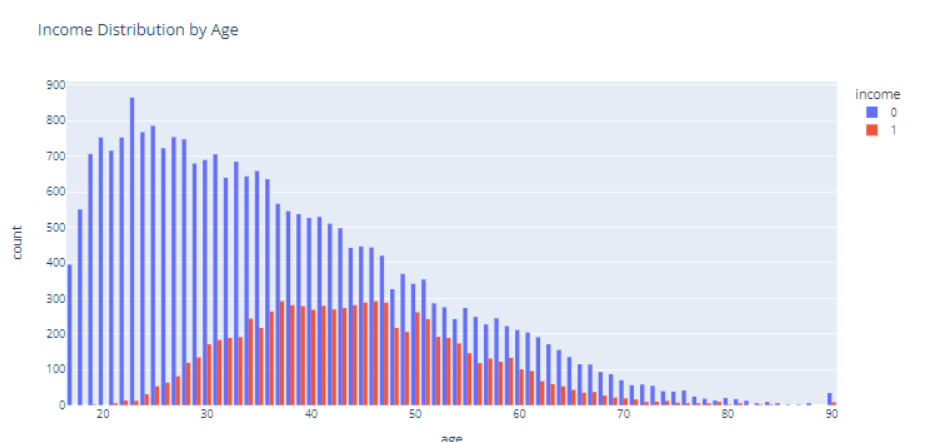

In [ ]:
# Splitting the data based on Sex
male_age = df[df["Sex"] == "male"]["Age"].dropna()
female_age = df[df["Sex"] == "female"]["Age"].dropna()

# Plotting the histogram
plt.figure(figsize=(10, 6))

plt.hist(male_age, bins=30, alpha=0.5, label='Male', color='blue')
plt.hist(female_age, bins=30, alpha=0.5, label='Female', color='magenta')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age by Sex')
plt.legend()

plt.show()

In [ ]:
# Detayli HistPlot (Mert B.)

# OOM (Object Oriented Method ile);

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(sd_returns['UAL'], bins=40, color='red', alpha=0.7, label='UAL')
ax1.axvline(mean_ual, color='blue', linestyle='--', linewidth=2, label='Mean UAL: {:.3f}'.format(mean_ual))
ax1.axvline(mean_ual + std_ual, color='blue', linestyle=':', linewidth=2, label='Std UAL: {:.3f}'.format(std_ual))
ax1.set_xlabel('Returns')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of UAL Returns')
ax1.legend()

ax2.hist(sd_returns['PG'], bins=40, color='blue', alpha=0.7, label='PG')
ax2.axvline(mean_pg, color='red', linestyle='--', linewidth=2, label='Mean PG: {:.3f}'.format(mean_pg))
ax2.axvline(mean_pg + std_pg, color='red', linestyle=':', linewidth=2, label='Std PG: {:.3f}'.format(std_pg))
ax2.set_xlabel('Returns')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of PG Returns')
ax2.legend()

plt.tight_layout()
plt.show()

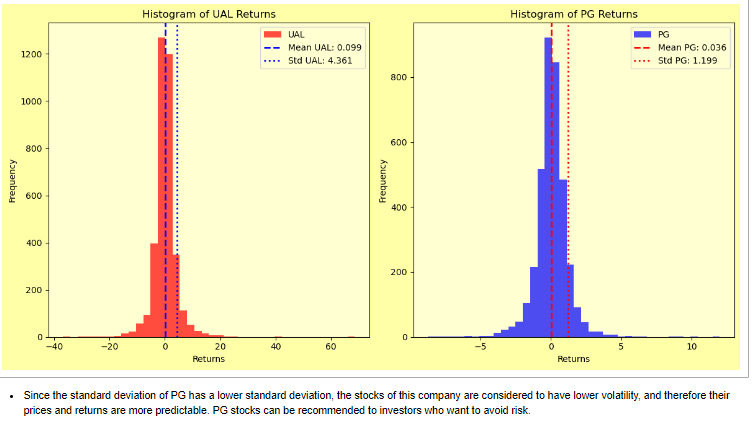

## HistPlot ile Bar ve Dagilim Egrisini Bir Arada Kullanmak

In [1]:
# Let's also examine this with histplot;

df_con = ["BTC","ETH", "ADA"] 

for i in df_con:
    sns.histplot(data = df, x = i, fill = True, linewidth = 2, kde = True)
    plt.title(i)
    plt.show()

NameError: name 'sns' is not defined

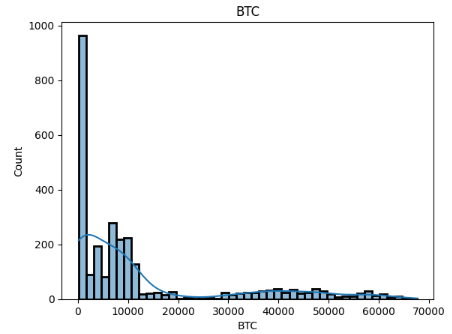

In [ ]:
# For BTC;
# If we want to draw the same graph by using Seaborn;

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x ="BTC", kde=True)

plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.title("BTC: Mean=" + str(mean) + ", std_sap=" + str(std_sap))

plt.show()

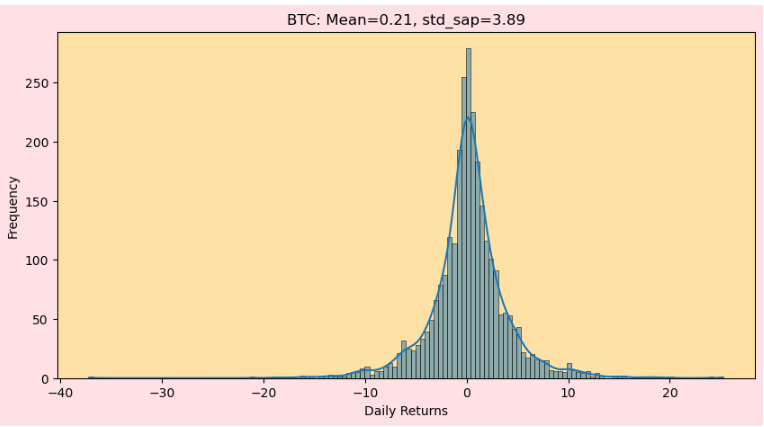

## RugPlot ile Yogunluklarin da Grafige Yansitilmasi

In [ ]:
# With rugplot;
sns.displot(data=df, x="BTC", bins=20, rug=True, kde=True);

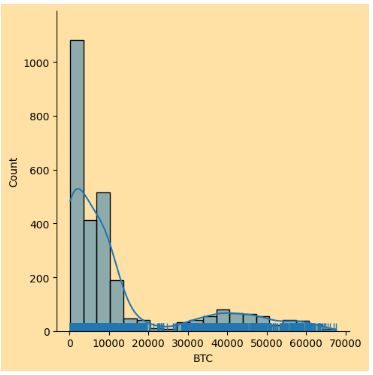

## SubPlot ile Birden Fazla Grafigin Belirli Konumlarda Cizdirilmesi 

In [ ]:
# Returns of Crypto Currencies;
plt.figure(figsize=(15,9))
plt.subplot(3, 1, 1)
plt.plot(df.Date, df.BTC, "r")

plt.subplot(3, 1, 2)
plt.plot(df.Date, df.ETH, "g")

plt.subplot(3, 1, 3)
plt.plot(df.Date, df.ADA, "y")

plt.tight_layout()
plt.show()

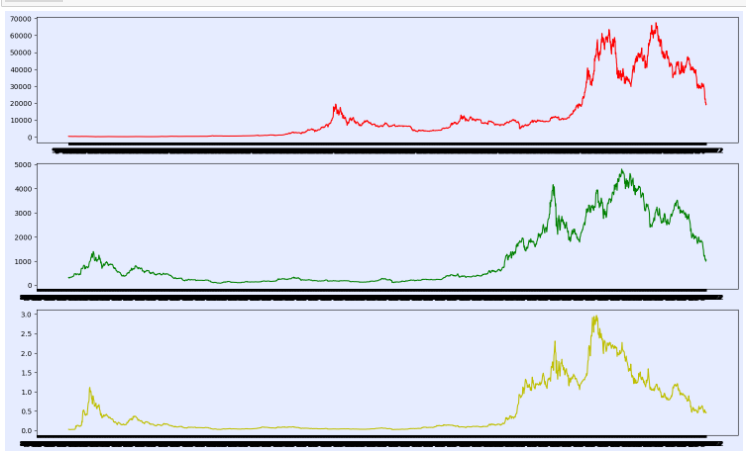

In [ ]:
# Let's draw the graphs side by side.

# Histplots of Crypto Currencies;
plt.figure(figsize=(15,6))
plt.subplot(1, 3, 1)
plt.hist(df.BTC, color = "red", bins=40, edgecolor='white', lw=2)
plt.xlabel("BTC")
plt.title("Histplots of BTC")

plt.subplot(1, 3, 2)
plt.hist(df.ETH, color = "green", bins=40, edgecolor='white', lw=2)
plt.xlabel("ETH")
plt.title("Histplots of ETH")

plt.subplot(1, 3, 3)
plt.hist(df.ADA, color = "orange", bins=40, edgecolor='white', lw=2)
plt.xlabel("ADA")
plt.title("Histplots of ADA")

plt.tight_layout()
plt.show()

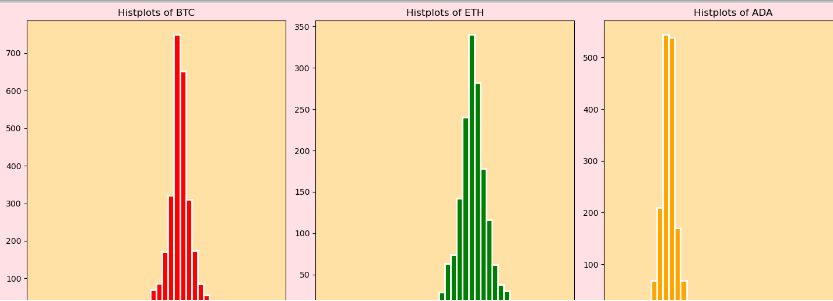

In [ ]:
# Bunu Seaborn ile yapalim;
# Histogram and KDE for returns of BTC and ETH by using 60 bins;
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.histplot(data = df, x = df.BTC, fill = False, linewidth = 2, kde = True, color="blue", bins=60)

plt.subplot(1, 2, 2)
sns.histplot(data = df, x = df.ETH, fill = False, linewidth = 2, kde = True, color="green", bins=60)

plt.show()

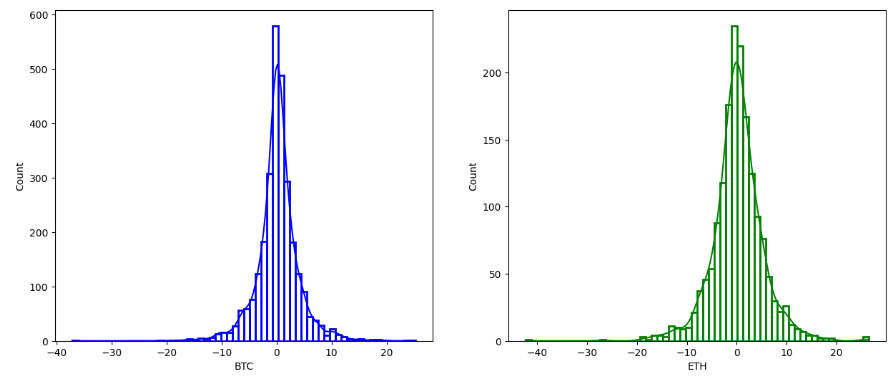

In [ ]:
# Iki grafigi ust uste cizdirmek icik;
plt.figure(figsize=(10, 5))

sns.set(style="dark")

sns.histplot(data=df, x="BTC", bins=60, kde=True, label="BTC", color="red")
sns.histplot(data=df, x="ETH", bins=60, kde=True, label="ETH", color="blue")

plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.title("Histogram of BTC and ETH Daily Returns")
plt.legend()

plt.show()

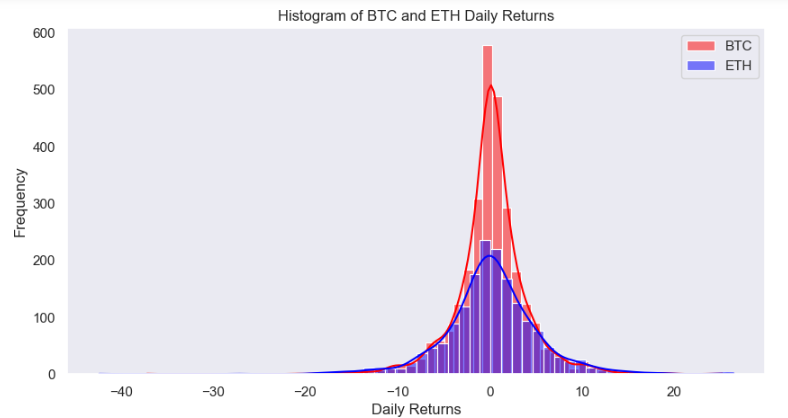

## fig ve ax Kullanarak Birden Fazla Grafigin Belirli Konumlarda Cizdirilmesi 

In [ ]:
# In the graphs above, the dates did not appear exactly. I will use "Pandas" to ensure this.
#  Here we draw the graph with pandas, this allows us to output the date in jumps. 

fig, ax = plt.subplots(3, 1, figsize=(10, 7))
df.plot(x="Date", y="BTC", label="Bitcoin Price", color="orange", lw=2, ax=ax[0])
df.plot(x="Date", y="ETH", label="Etherium Price", color="lightblue", lw=2, ax=ax[1])
df.plot(x="Date", y="ADA", label="Cardano Price", color="lightgreen", lw=2, ax=ax[2])

plt.tight_layout()

plt.show()

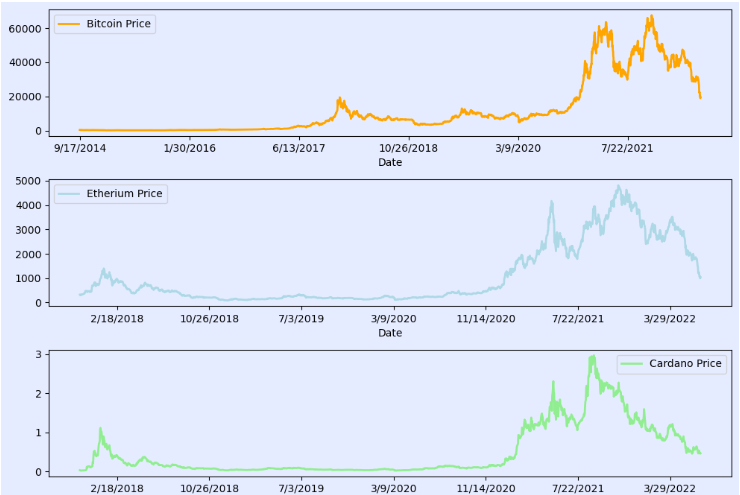

In [ ]:
# List of numerical columns we're interested in
numerical_cols = ['Age', 'Pclass', 'Fancy', 'Standard_Fare', 'Family_Size']

# Create a pair of scatter plots for the numerical columns
plt.figure(figsize=(15,15))
plot_num = 1

for i in range(len(numerical_cols)):
    for j in range(len(numerical_cols)):
        plt.subplot(len(numerical_cols), len(numerical_cols), plot_num)
        if i != j:
            sns.scatterplot(data=df, x=numerical_cols[i], y=numerical_cols[j], hue="Survived", palette="Set1", alpha=0.5)
        else:
            # Diagonal: display a histogram
            sns.histplot(df[numerical_cols[i]], kde=True, color='skyblue')
        plot_num += 1

plt.tight_layout()
plt.show()

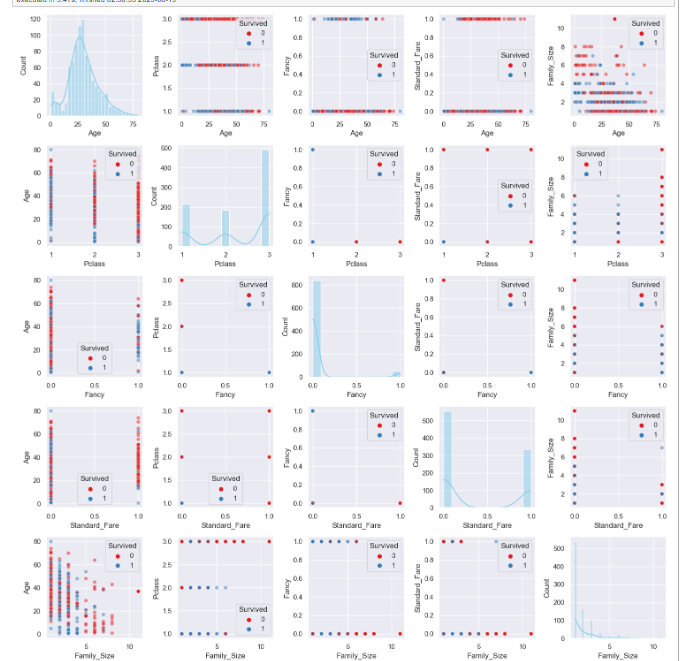

## 3D Grafik

In [ ]:
# Plot a 3D plot showing all daily returns from JPM, AAPL and UAL [External Research is required].

# plt.figue(figsize=(10,10,10))

fig = px.scatter_3d(sd_returns, x="JPM", y="AAPL", z="UAL")
fig.show()